dataset: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9

## Abstract

This project evaluates seven different machine learning models for handwritten digit recognition using thHandwritten DigitST dataset. We assess each model's accuracy and computational efficiency to determine the most effective approach for digit classification. The analysis aims to highlight the strengths and limitations of each model in practical applications.


## TensorFlow Version and GPU Utilization

For this project, we use TensorFlow version 2.10.0. This specific version was chosen to ensure compatibility with our computational setup, which includes an Nvidia RTX 4070 GPU. TensorFlow 2.10.0 provides optimized support for GPU acceleration, enabling efficient training and evaluation of our machine learning models.


In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.10.0'

# Import necessary libraries and modules for data handling, visualization, and model evaluation.

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
from tensorflow.keras.preprocessing import image
import importlib
import helper_functions
importlib.reload(helper_functions)
import time
from helper_functions import view_random_image,display_random_samples,calculate_results,plot_loss_curves

## List of Models

1. **Model 1**: 2 Convolutional Layers (CNN) and 2 Max Pooling Layers
2. **Model 2**: 3 Convolutional Layers (CNN), 2 Max Pooling Layers, and 2 Dropout Layers
3. **ResNet 50V2**
4. **EfficientNet V2B2**
5. **ResNet 50V2 (Trainable)**
6. **ResNet 50V2 with 2 Dense Layers and 1 Dropout Layer**
7. **ResNet 50V2 (Trainable) with 3 Dense Layers and 1 Dropout Layer**


## Count and print the number of directories and images in the "dataset/" directory

In [4]:
for dirpath, dirnames, filenames in os.walk("dataset/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 10 directories and 0 images in 'dataset/'
There are 0 directories and 2236 images in 'dataset/0'
There are 0 directories and 2241 images in 'dataset/1'
There are 0 directories and 2233 images in 'dataset/2'
There are 0 directories and 2202 images in 'dataset/3'
There are 0 directories and 2179 images in 'dataset/4'
There are 0 directories and 2126 images in 'dataset/5'
There are 0 directories and 2121 images in 'dataset/6'
There are 0 directories and 2116 images in 'dataset/7'
There are 0 directories and 2085 images in 'dataset/8'
There are 0 directories and 2016 images in 'dataset/9'


## View a random image from the "dataset/" directory, specifically from the "2" class

(140, 90, 3)

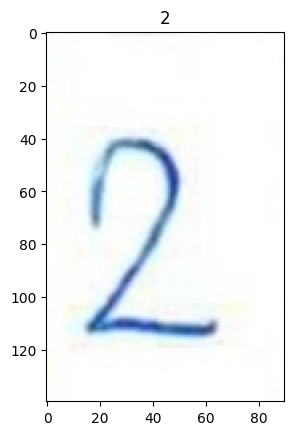

In [5]:
view_random_image("dataset/","2")

# Create training and validation datasets using image_dataset_from_directory

## The following code loads images from the "dataset/" directory and prepares them for training and validation.
## Images are resized to 224x224 pixels and batched with a batch size of 32.
## The dataset is shuffled and split into training and validation subsets with a 20% validation split.
## Labels are encoded as categorical (one-hot encoded).

In [6]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory("dataset/",
                                                             label_mode="categorical",
                                                             color_mode="rgb",
                                                             batch_size=32,
                                                             image_size=(224,224),
                                                             shuffle = True,
                                                             seed=42,
                                                             validation_split=0.2,
                                                             subset = "training"
                                                             )
                                                              

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory("dataset/",
                                                                        label_mode="categorical",
                                                                        color_mode="rgb",
                                                                        batch_size=32,
                                                                        image_size=(224,224),
                                                                         shuffle=True,
                                                                         seed=42,
                                                                         validation_split=0.2,
                                                                         subset="validation")


Found 21555 files belonging to 10 classes.
Using 17244 files for training.
Found 21555 files belonging to 10 classes.
Using 4311 files for validation.


For `images, labels in train_dataset.take(1):` (where `take(1)` fetches one batch from the dataset), this code prints the shape of the image and label batches. This helps in verifying the batch dimensions and ensuring that the data is loaded correctly. The `images.shape` shows the shape of the image batch, and `labels.shape` shows the shape of the label batch.


In [7]:
for images, labels in train_dataset.take(1):  # take(1) fetches one batch from the dataset
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 10)


### Initialize lists to store computational results

In [8]:
time_spent = []
steps_of_epochs=[]
number_of_epochs=[]

### Model 1: Convolutional Neural Network (CNN)

We begin by defining and training Model 1, a Convolutional Neural Network (CNN) with the following architecture:

1. **Architecture:**
   - 2 Convolutional layers with ReLU activation functions.
   - 2 Max Pooling layers.
   - A Flatten layer.
   - A Dense output layer with 10 units and a softmax activation function.

2. **Compilation:**
   - Loss function: Categorical Crossentropy.
   - Optimizer: Adam.
   - Metrics: Accuracy, Recall, and Precision.

3. **Training:**
   - The model is trained for 30 epochs with the `train_dataset`, using a batch size of 32.
   - Validation is performed using `validation_dataset`.
   - Callbacks include ModelCheckpoint (to save the best model), EarlyStopping (to prevent overfitting), and ReduceLROnPlateau (to adjust the learning rate).

4. **Time Tracking:**
   - Training time is calculated and appended to the `time_spent` list.
   - Number of epochs and steps per epoch are recorded.

5. **Post-Training:**
   - The model is saved and reloaded.
   - Evaluation on the validation dataset is performed.
   - Loss curves are plotted, and random samples are displayed for visual verification.

This process ensures the model's performance is tracked and evaluated comprehensively.


In [9]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,activation="relu",
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(128,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(128,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")],name="model_1.keras"
                    
)

In [10]:
model_1.summary()

Model: "model_1.keras"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 128)     11648     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 128)    0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 373248)          

In [11]:
model_1.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy",tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [12]:
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [13]:
start_time = time.time()
model_1_history = model_1.fit(train_dataset,
                        epochs=30,
                        steps_per_epoch=len(train_dataset)//32,
                        validation_data = validation_dataset,
                        validation_steps = len(validation_dataset)//32,
                        callbacks=[create_model_checkpoint(model_name=model_1.name),
                                   tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)]
                        
                       )

Epoch 1/30
16/16 [==============================] - 8s 158ms/step - loss: 211.1584 - accuracy: 0.1055 - recall: 0.0566 - precision: 0.1028 - val_loss: 2.2782 - val_accuracy: 0.1172 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - lr: 0.0010
Epoch 2/30
16/16 [==============================] - 2s 142ms/step - loss: 2.3164 - accuracy: 0.1562 - recall: 0.0020 - precision: 0.0667 - val_loss: 2.3014 - val_accuracy: 0.0703 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - lr: 0.0010
Epoch 3/30
16/16 [==============================] - 2s 141ms/step - loss: 2.3128 - accuracy: 0.1367 - recall: 0.0020 - precision: 0.2000 - val_loss: 2.3027 - val_accuracy: 0.0938 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - lr: 0.0010
Epoch 4/30
16/16 [==============================] - 2s 141ms/step - loss: 2.2984 - accuracy: 0.1523 - recall: 0.0078 - precision: 0.4000 - val_loss: 2.2974 - val_accuracy: 0.0703 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - lr: 0.0010
Epoch 5/30
16/16 [

In [14]:
end_time = time.time()
model_1_time_spent = (end_time - start_time)/60
print(model_1_time_spent)

1.2246950427691141


In [15]:
model_1_epochs = 30
model_1_steps_of_epochs = 16
time_spent.append(model_1_time_spent)
steps_of_epochs.append(model_1_steps_of_epochs)
number_of_epochs.append(model_1_epochs)

In [16]:
model_1 = tf.keras.models.load_model("model_experiments/model_1.keras")

In [17]:
model_1_evaluate = model_1.evaluate(validation_dataset)

model_1_evaluate

135/135 [==============================] - 6s 46ms/step - loss: 2.0091 - accuracy: 0.3027 - recall: 0.1011 - precision: 0.4915


[2.009122848510742,
 0.3027139902114868,
 0.10113662481307983,
 0.49154454469680786]

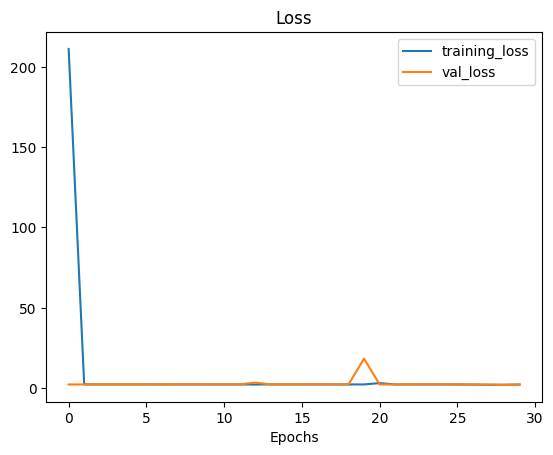

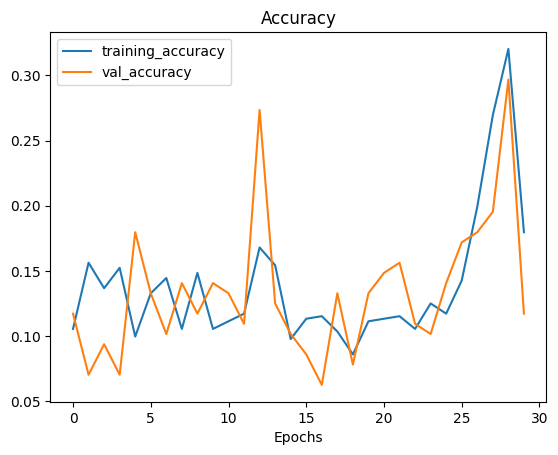

In [18]:
plot_loss_curves(model_1_history)

1/1 [==============================] - 0s 12ms/step


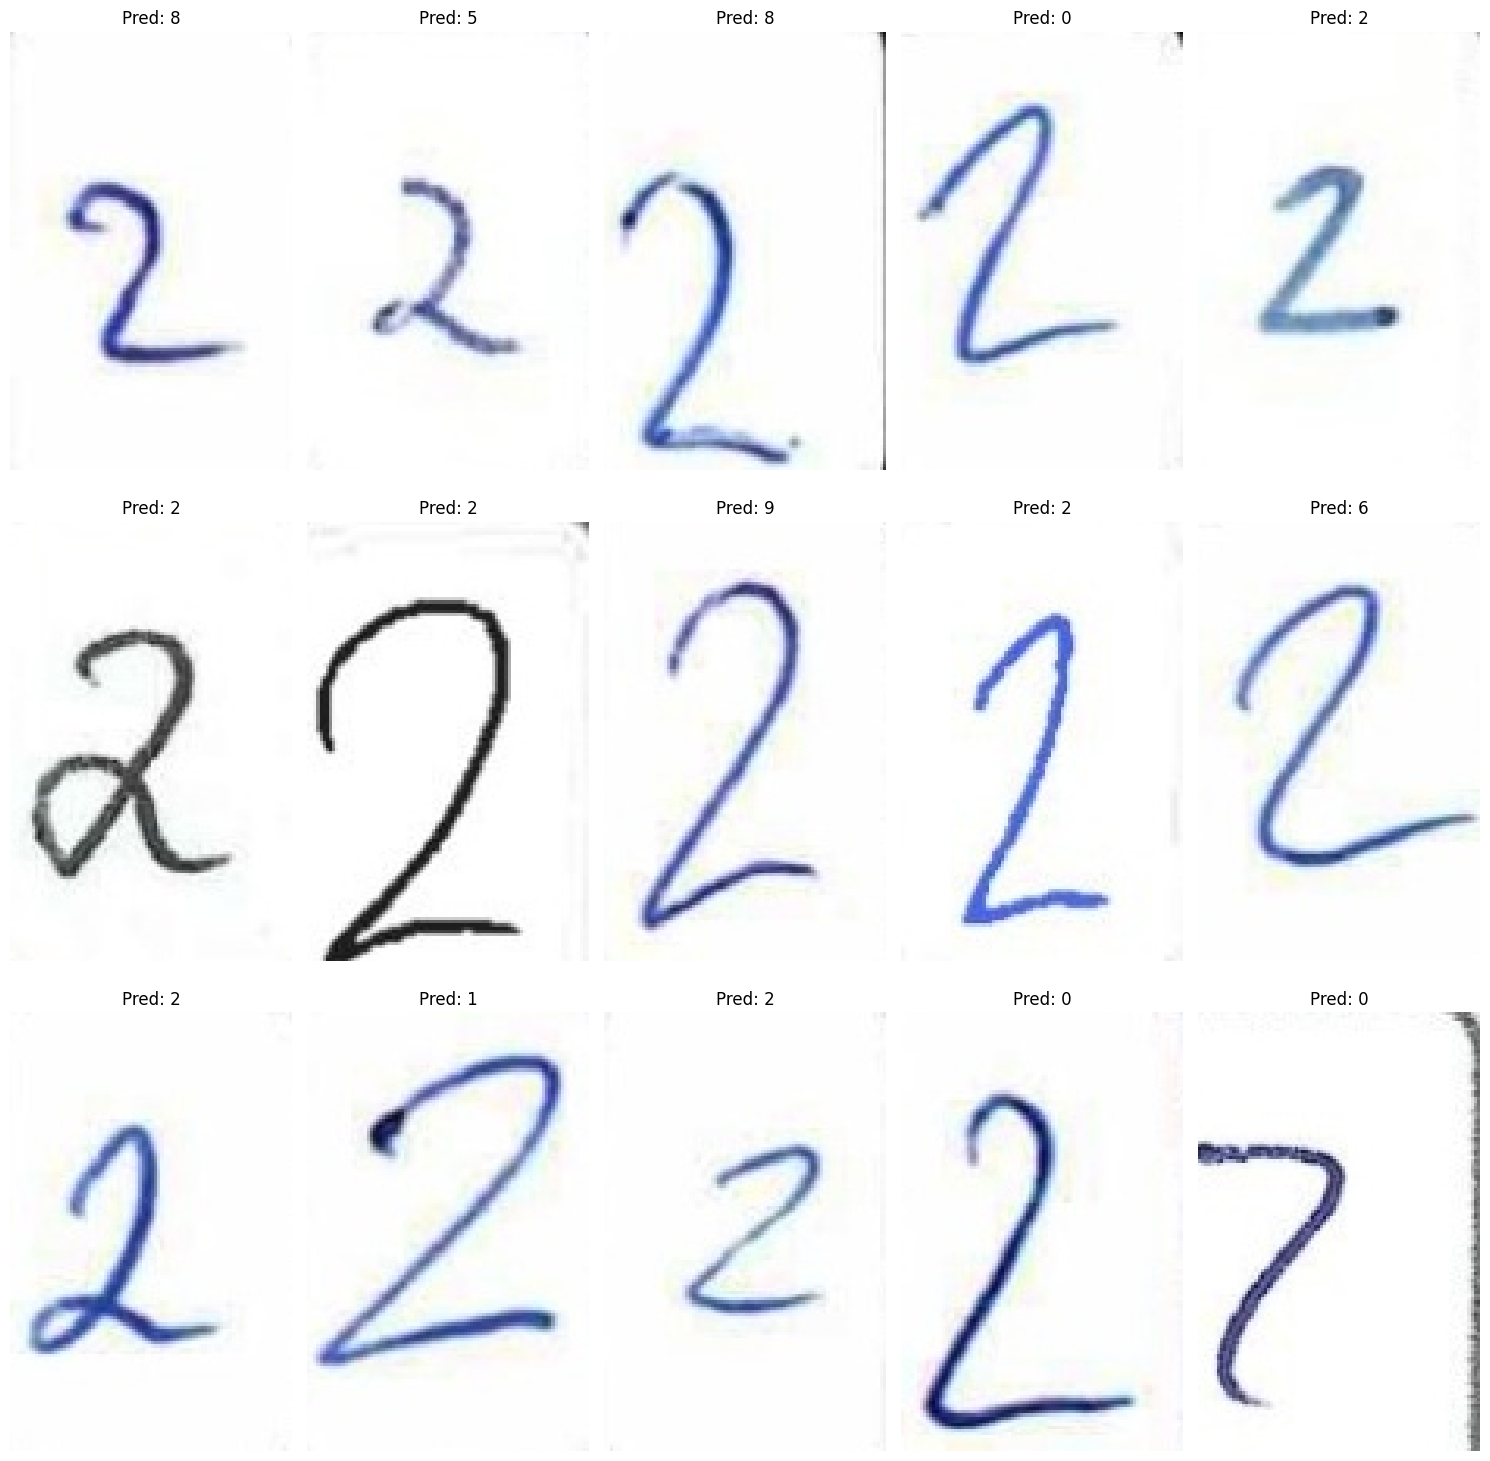

In [19]:
display_random_samples(model_1,"dataset/2",right=False)

1/1 [==============================] - 0s 12ms/step


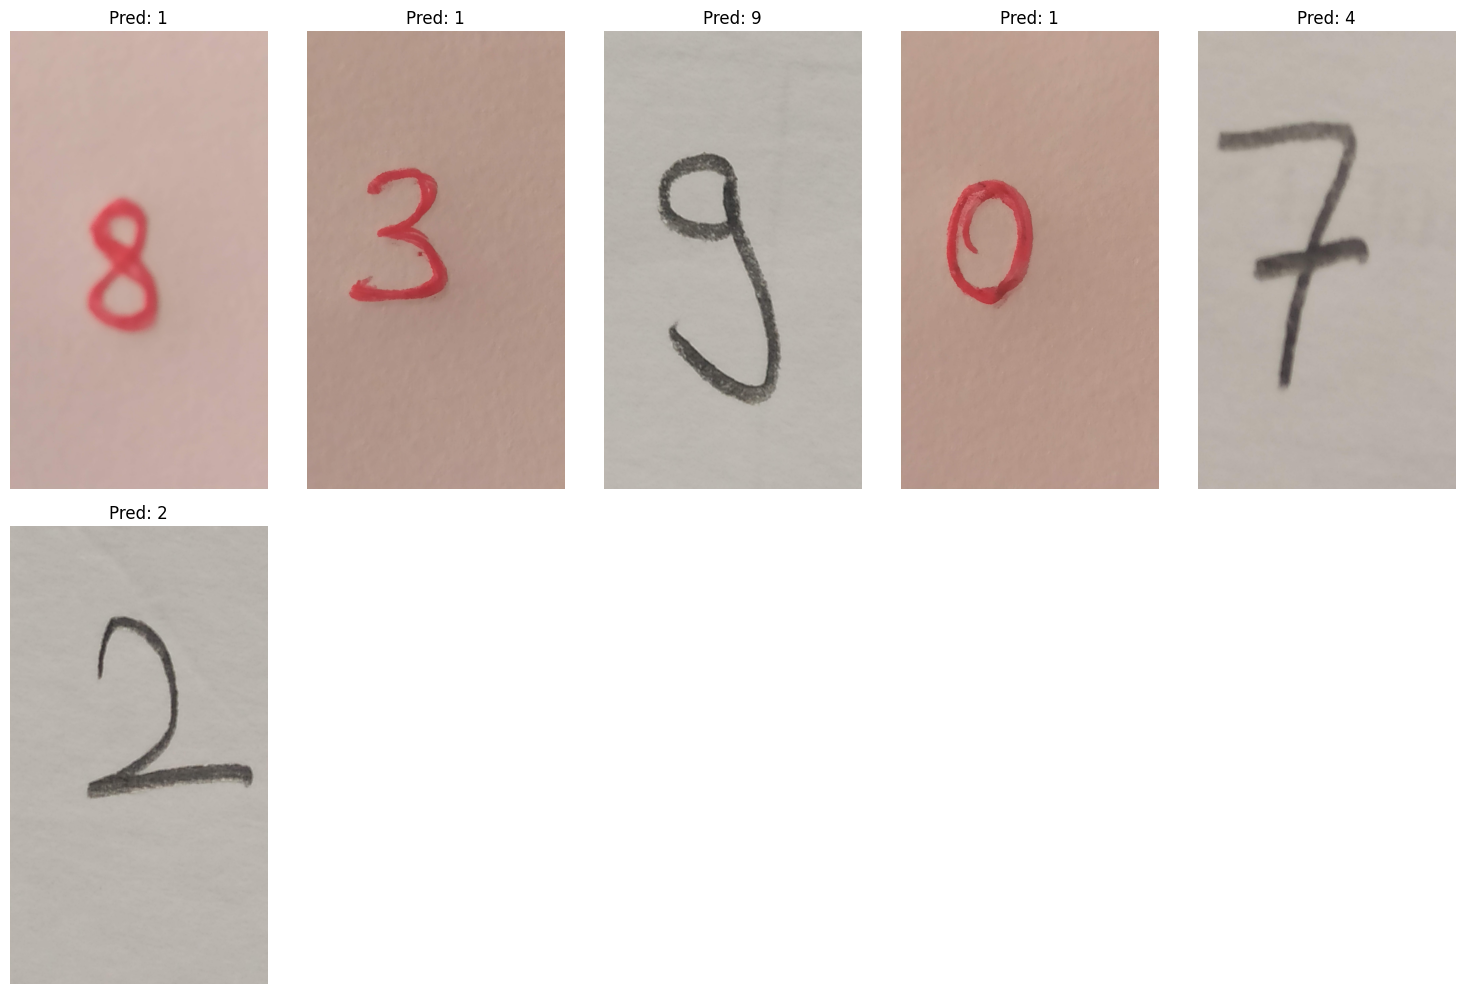

In [20]:
display_random_samples(model_1,"test_real/real",right=True)

### Model 2: Convolutional Neural Network with Dropout

We proceed with defining and training Model 2, a Convolutional Neural Network (CNN) with dropout layers:

1. **Architecture:**
   - 2 Convolutional layers with ReLU activation functions.
   - 2 Dropout layers with a dropout rate of 0.1.
   - 2 Max Pooling layers.
   - A Flatten layer.
   - A Dense output layer with 10 units and a softmax activation function.

2. **Compilation:**
   - Loss function: Categorical Crossentropy.
   - Optimizer: Adam.
   - Metrics: Accuracy, Recall, and Precision.

3. **Training:**
   - The model is trained for 30 epochs with the `train_dataset`, using a batch size of 32.
   - Validation is performed using `validation_dataset`.
   - Only the ModelCheckpoint callback is used to save the best model.

4. **Time Tracking:**
   - Training time is calculated and appended to the `time_spent` list.
   - Number of epochs and steps per epoch are recorded.

5. **Post-Training:**
   - The model summary is printed.
   - Loss curves are plotted.
   - The model is reloaded and evaluated on the validation dataset.
   - Random samples are displayed for visual verification.

This setup aims to improve the model's robustness with dropout regularization.


In [21]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,activation="relu",
                          input_shape=(224,224,3)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(128,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(128,3,activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")],name="model_2.keras"
                    
)

In [22]:
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy",tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [23]:
model_2.summary()

Model: "model_2.keras"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 dropout (Dropout)           (None, 222, 222, 10)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 128)     11648     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 128)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 128)     147584    
                                                                 
 dropout_1 (Dropout)         (None, 108, 108, 128)     0         
                                                     

In [24]:
start_time = time.time()
model_2_history = model_2.fit(train_dataset,
                        epochs=30,
                        steps_per_epoch=len(train_dataset)//32,
                        validation_data = validation_dataset,
                        validation_steps = len(validation_dataset)//32,
                        callbacks = [create_model_checkpoint(model_2.name)])


Epoch 1/30
16/16 [==============================] - 3s 173ms/step - loss: 537.9835 - accuracy: 0.1094 - recall_1: 0.0469 - precision_1: 0.1231 - val_loss: 2.2996 - val_accuracy: 0.1562 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 2/30
16/16 [==============================] - 3s 168ms/step - loss: 2.3761 - accuracy: 0.1523 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 2.2945 - val_accuracy: 0.1406 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 3/30
16/16 [==============================] - 3s 160ms/step - loss: 2.3041 - accuracy: 0.1289 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 2.3026 - val_accuracy: 0.1016 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 4/30
16/16 [==============================] - 3s 160ms/step - loss: 2.3022 - accuracy: 0.1035 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 2.3030 - val_accuracy: 0.1094 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 5/30
16/

In [25]:
end_time = time.time()
model_2_time_spent = (end_time - start_time)/60

model_2_epochs = 30
model_2_steps_of_epochs = 16
time_spent.append(model_2_time_spent)
steps_of_epochs.append(model_2_steps_of_epochs)
number_of_epochs.append(model_2_epochs)

model_2_time_spent

1.2921386996905009

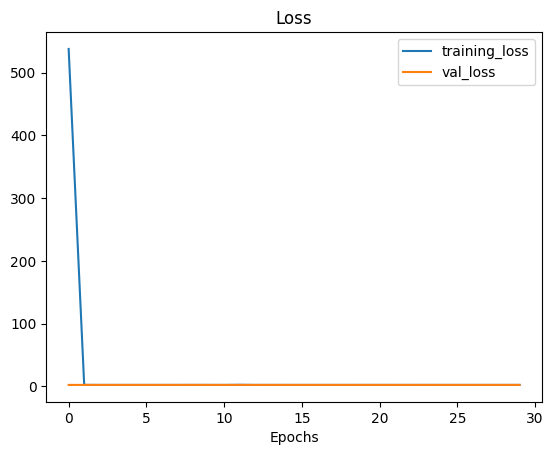

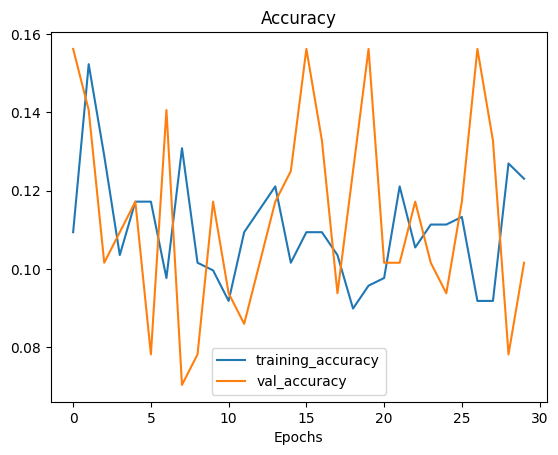

In [26]:
plot_loss_curves(model_2_history)

In [27]:
model_2 = tf.keras.models.load_model("model_experiments/model_2.keras")

In [28]:
model_2_evaluate = model_2.evaluate(validation_dataset)
model_2_evaluate

135/135 [==============================] - 6s 41ms/step - loss: 2.2807 - accuracy: 0.1712 - recall_1: 0.0014 - precision_1: 0.6667


[2.280729055404663,
 0.17118997871875763,
 0.0013917884789407253,
 0.6666666865348816]

1/1 [==============================] - 0s 14ms/step


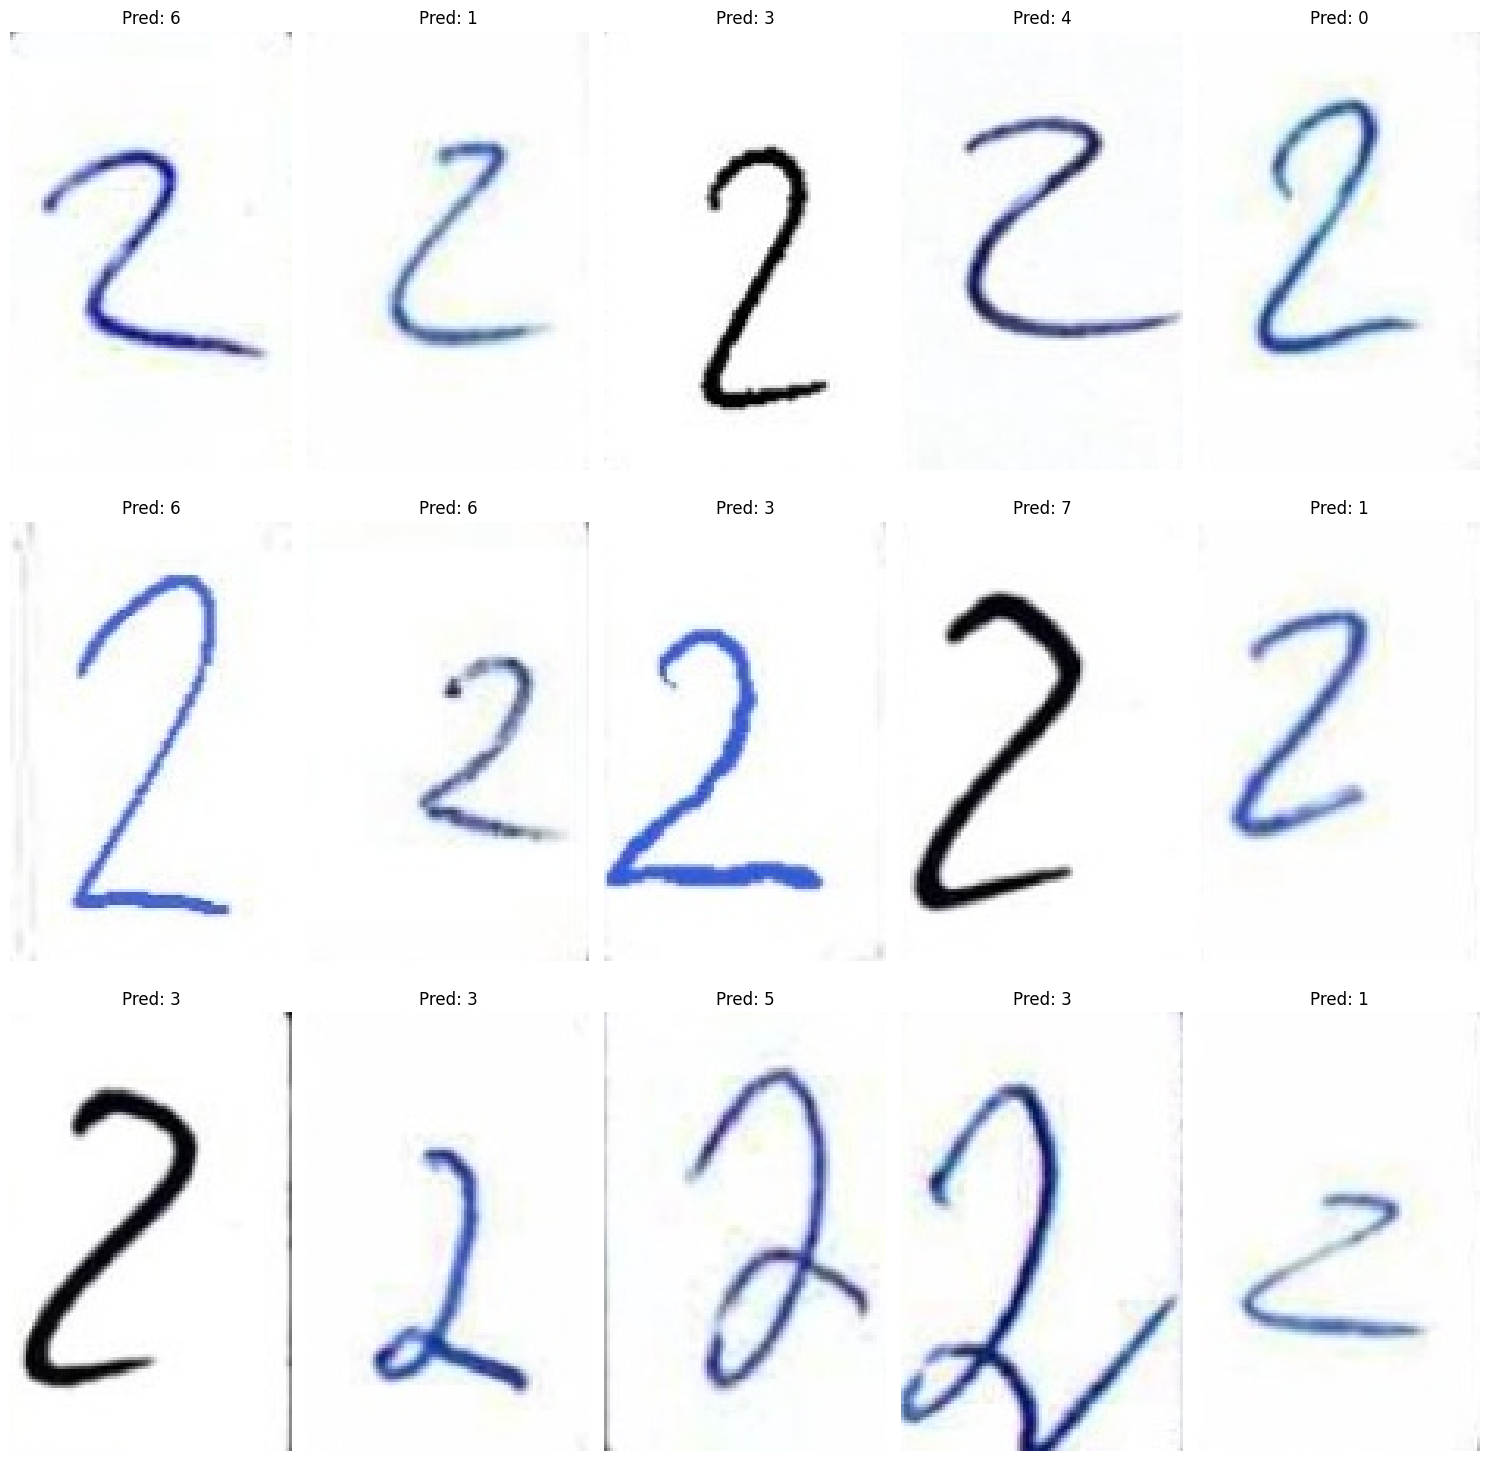

In [29]:
display_random_samples(model_2,"dataset/2",right=False)

1/1 [==============================] - 0s 12ms/step


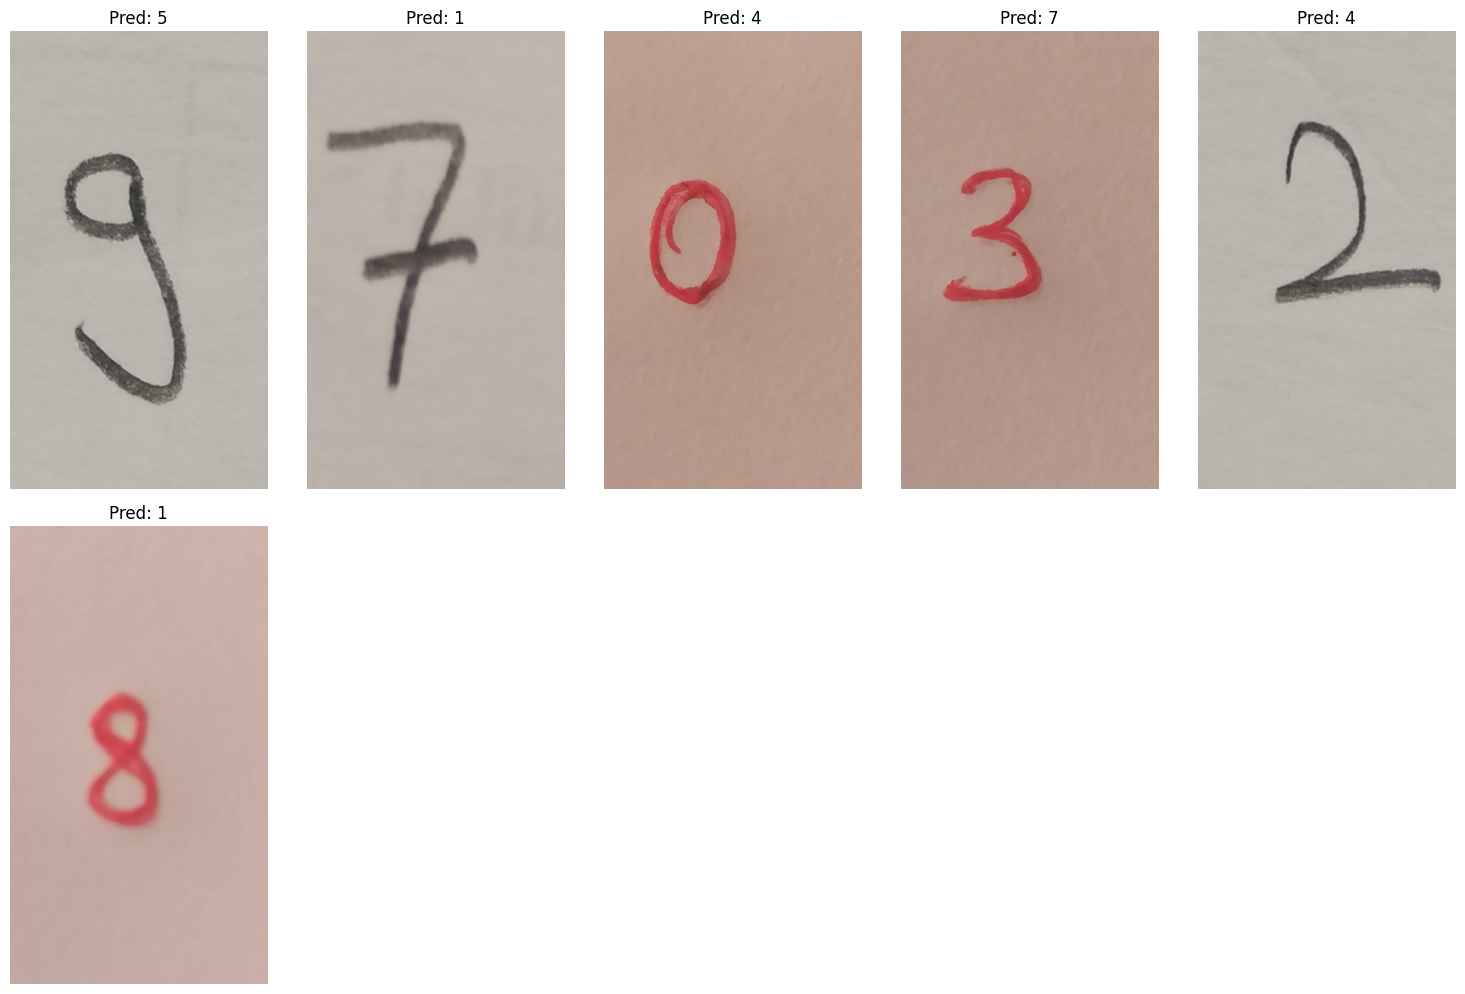

In [30]:
display_random_samples(model_2,"test_real/real",right=True)

### Model 3: ResNet50V2 with Custom Dense Layers

We implement and train a ResNet50V2 model with custom top layers:

1. **Architecture:**
   - **Base Model:** ResNet50V2 pre-trained on ImageNet, without the top classification layer (`include_top=False`).
   - **Custom Top Layers:**
     - Global Average Pooling layer.
     - Dense layer with 128 units and ReLU activation.
     - Dense output layer with 10 units and softmax activation.

2. **Compilation:**
   - Loss function: Categorical Crossentropy.
   - Optimizer: Adam.
   - Metrics: Accuracy, Recall, and Precision.

3. **Training:**
   - The model is trained for 10 epochs with the `train_dataset`, using a batch size of 32.
   - Validation is performed using `validation_dataset`.
   - ModelCheckpoint callback is used to save the best model.

4. **Time Tracking:**
   - Training time is calculated and appended to the `time_spent` list.
   - Number of epochs and steps per epoch are recorded.

5. **Post-Training:**
   - Loss curves are plotted.
   - The model is reloaded from the saved file and evaluated on the validation dataset.
   - Random samples are displayed for visual inspection.

This setup leverages the pre-trained ResNet50V2 base model with additional custom layers to adapt the model to the specific classification task.


In [31]:
from tensorflow.keras.applications import ResNet50V2

base_model = ResNet50V2(include_top= False,
                                weights="imagenet",
                                input_shape=(224,224,3))

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation="relu")(x)
outputs = tf.keras.layers.Dense(10,activation="softmax")(x)
resnet_50 = tf.keras.Model(inputs = base_model.input,outputs = outputs,name="resnet_50.keras")

resnet_50.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy",tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
start_time = time.time()

resnet50_history = resnet_50.fit(train_dataset,
                               epochs=10,
                               steps_per_epoch=len(train_dataset)//32,
                               validation_data = validation_dataset,
                               validation_steps = len(validation_dataset)//32,
                               callbacks = [create_model_checkpoint(resnet_50.name)])        

Epoch 1/10
16/16 [==============================] - 8s 257ms/step - loss: 1.0341 - accuracy: 0.6484 - recall_2: 0.5371 - precision_2: 0.8871 - val_loss: 87.8628 - val_accuracy: 0.0938 - val_recall_2: 0.0938 - val_precision_2: 0.0938
Epoch 2/10
16/16 [==============================] - 3s 190ms/step - loss: 0.5541 - accuracy: 0.8320 - recall_2: 0.7910 - precision_2: 0.8766 - val_loss: 1183.0481 - val_accuracy: 0.0469 - val_recall_2: 0.0469 - val_precision_2: 0.0469
Epoch 3/10
16/16 [==============================] - 3s 220ms/step - loss: 0.4431 - accuracy: 0.8672 - recall_2: 0.8281 - precision_2: 0.9177 - val_loss: 27.4928 - val_accuracy: 0.0781 - val_recall_2: 0.0781 - val_precision_2: 0.0781
Epoch 4/10
16/16 [==============================] - 3s 221ms/step - loss: 0.2954 - accuracy: 0.9023 - recall_2: 0.8867 - precision_2: 0.9303 - val_loss: 7.2540 - val_accuracy: 0.0703 - val_recall_2: 0.0703 - val_precision_2: 0.0714
Epoch 5/10
16/16 [==============================] - 3s 191ms/step -

In [32]:
end_time = time.time()
resnet_time_spent = (end_time - start_time)/60
resnet_epochs = 10
resnet_steps_of_epochs = 16
time_spent.append(resnet_time_spent)
steps_of_epochs.append(resnet_steps_of_epochs)
number_of_epochs.append(resnet_epochs)

resnet_time_spent

0.620102326075236

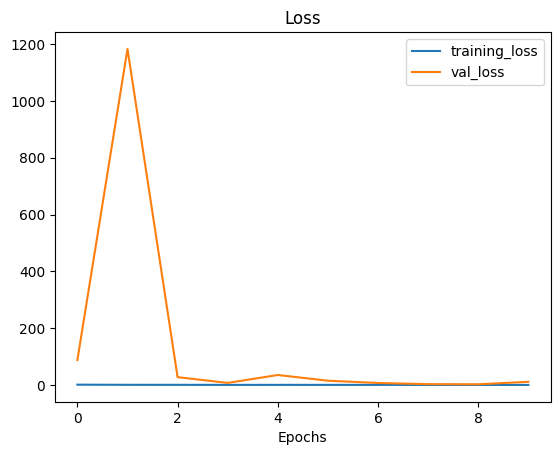

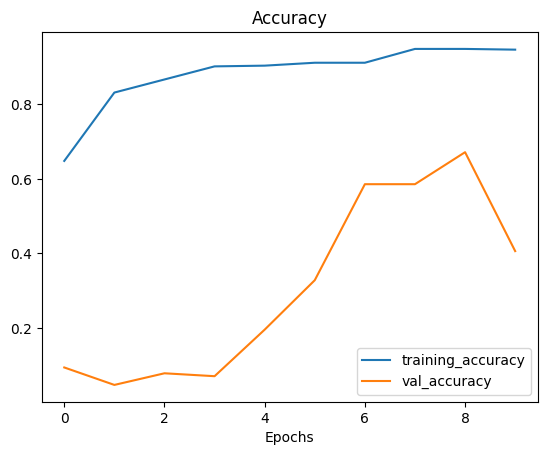

In [33]:
plot_loss_curves(resnet50_history)

In [34]:
resnet_50 = tf.keras.models.load_model("model_experiments/Resnet_50.keras")
model_resnet_evaluate = resnet_50.evaluate(validation_dataset)
model_resnet_evaluate

135/135 [==============================] - 8s 55ms/step - loss: 2.5749 - accuracy: 0.6885 - recall_2: 0.6808 - precision_2: 0.6998


[2.574937105178833, 0.6884713768959045, 0.6808165311813354, 0.6998092532157898]

1/1 [==============================] - 0s 16ms/step


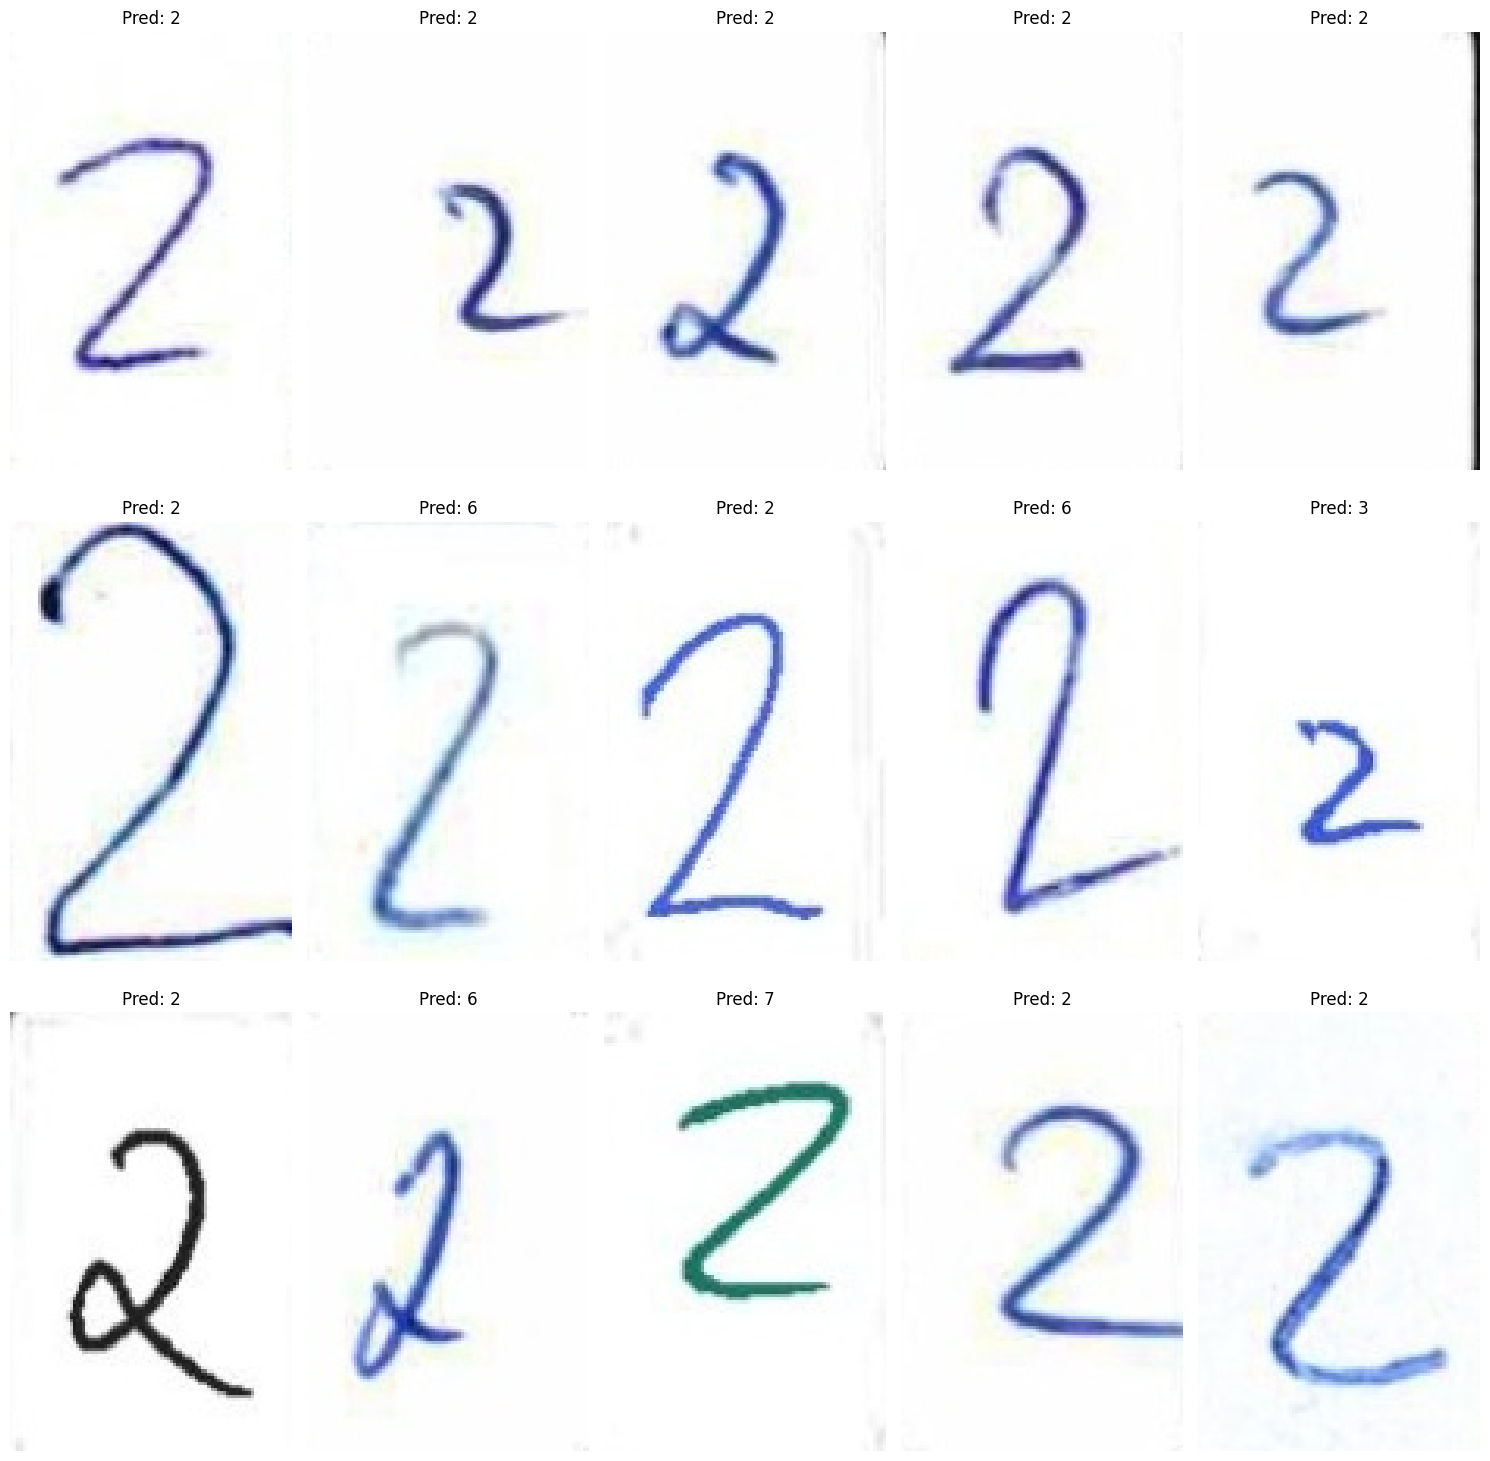

In [35]:
display_random_samples(resnet_50, "dataset/2", right=False)

1/1 [==============================] - 0s 20ms/step


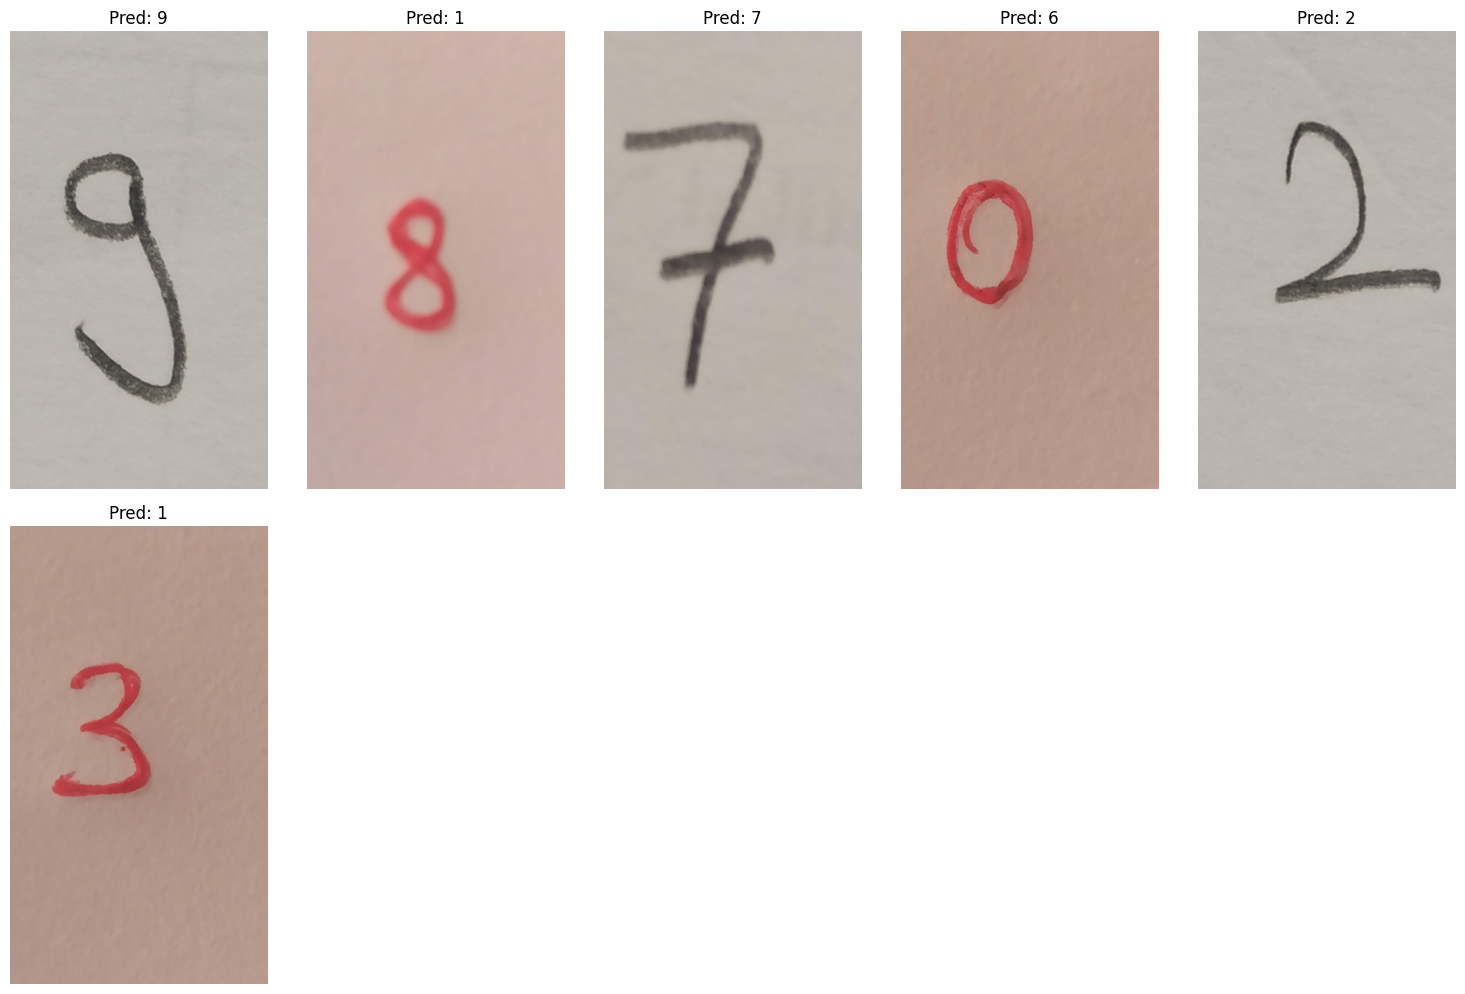

In [36]:
display_random_samples(resnet_50, "test_real/real", right=True)

Model 4: EfficientNetV2B2 with Custom Dense Layers
We define and train an EfficientNetV2B2 model with custom top layers:

Architecture:

Base Model: EfficientNetV2B2 pre-trained on ImageNet, without the top classification layer (include_top=False).
Custom Top Layers:
Global Average Pooling layer.
Dense layer with 128 units and ReLU activation.
Dense output layer with 10 units and softmax activation.
Compilation:

Loss function: Categorical Crossentropy.
Optimizer: Adam.
Metrics: Accuracy, Recall, and Precision.
Training:

The model is trained for 10 epochs with the train_dataset, using a batch size of 32.
Validation is performed using validation_dataset.
ModelCheckpoint callback is used to save the best model.
Time Tracking:

Training time is calculated and appended to the time_spent list.
Number of epochs and steps per epoch are recorded.
Post-Training:

Loss curves are plotted.
The model is reloaded from the saved file and evaluated on the validation dataset.
Random samples are displayed for visual inspection.
This approach uses the EfficientNetV2B2 base model with additional custom layers for effective classification and evaluation.

In [37]:
from keras.applications import EfficientNetV2B2

base_model = EfficientNetV2B2(include_top = False,
                             weights = "imagenet",
                             input_shape= (224,224,3))

In [38]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation="relu")(x)
outputs = tf.keras.layers.Dense(10,activation="softmax")(x)
efficient = tf.keras.Model(inputs = base_model.input,outputs = outputs,name="efficient.keras")

In [39]:
efficient.compile(loss= "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy",tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [40]:
start_time = time.time()
efficient_history = efficient.fit(train_dataset,
                               epochs=10,
                               steps_per_epoch=len(train_dataset)//32,
                               validation_data = validation_dataset,
                               validation_steps = len(validation_dataset)//32,
                               callbacks = [create_model_checkpoint(efficient.name)])      

Epoch 1/10
16/16 [==============================] - 12s 272ms/step - loss: 1.3458 - accuracy: 0.5898 - recall_3: 0.3086 - precision_3: 0.8876 - val_loss: 0.1295 - val_accuracy: 0.9531 - val_recall_3: 0.9453 - val_precision_3: 0.9528
Epoch 2/10
16/16 [==============================] - 3s 172ms/step - loss: 0.4322 - accuracy: 0.8730 - recall_3: 0.8418 - precision_3: 0.8942 - val_loss: 0.3329 - val_accuracy: 0.8984 - val_recall_3: 0.8984 - val_precision_3: 0.9055
Epoch 3/10
16/16 [==============================] - 3s 172ms/step - loss: 0.2161 - accuracy: 0.9336 - recall_3: 0.9199 - precision_3: 0.9554 - val_loss: 0.1555 - val_accuracy: 0.9375 - val_recall_3: 0.9375 - val_precision_3: 0.9449
Epoch 4/10
16/16 [==============================] - 3s 171ms/step - loss: 0.1718 - accuracy: 0.9414 - recall_3: 0.9355 - precision_3: 0.9485 - val_loss: 0.1571 - val_accuracy: 0.9531 - val_recall_3: 0.9453 - val_precision_3: 0.9528
Epoch 5/10
16/16 [==============================] - 3s 172ms/step - los

In [41]:
end_time = time.time()
efficient_time_spent = (end_time - start_time)/60
efficient_epochs = 10
efficient_steps_of_epochs = 16
time_spent.append(efficient_time_spent)
steps_of_epochs.append(efficient_steps_of_epochs)
number_of_epochs.append(efficient_epochs)
efficient_time_spent

0.6316799521446228

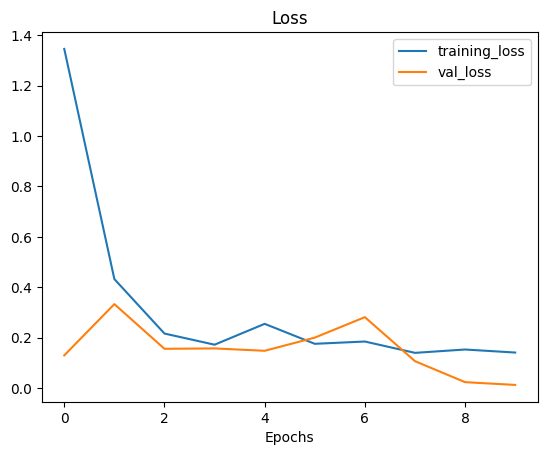

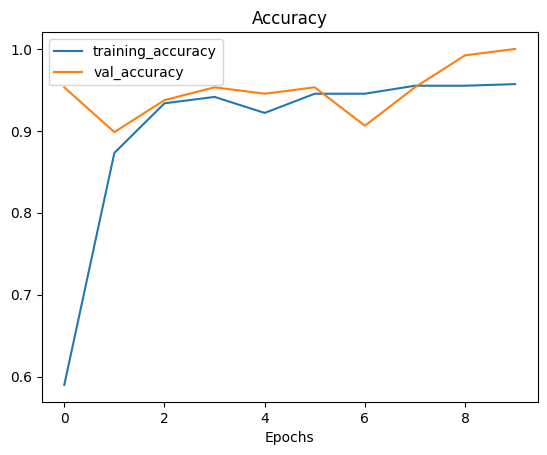

In [42]:
plot_loss_curves(efficient_history)

In [43]:
efficient = tf.keras.models.load_model("model_experiments/efficient.keras")
efficient_evaluate = efficient.evaluate(validation_dataset)
efficient_evaluate

135/135 [==============================] - 7s 45ms/step - loss: 0.0645 - accuracy: 0.9828 - recall_3: 0.9817 - precision_3: 0.9849


[0.06449071317911148,
 0.9828346371650696,
 0.9816747903823853,
 0.9848731756210327]

1/1 [==============================] - 0s 18ms/step


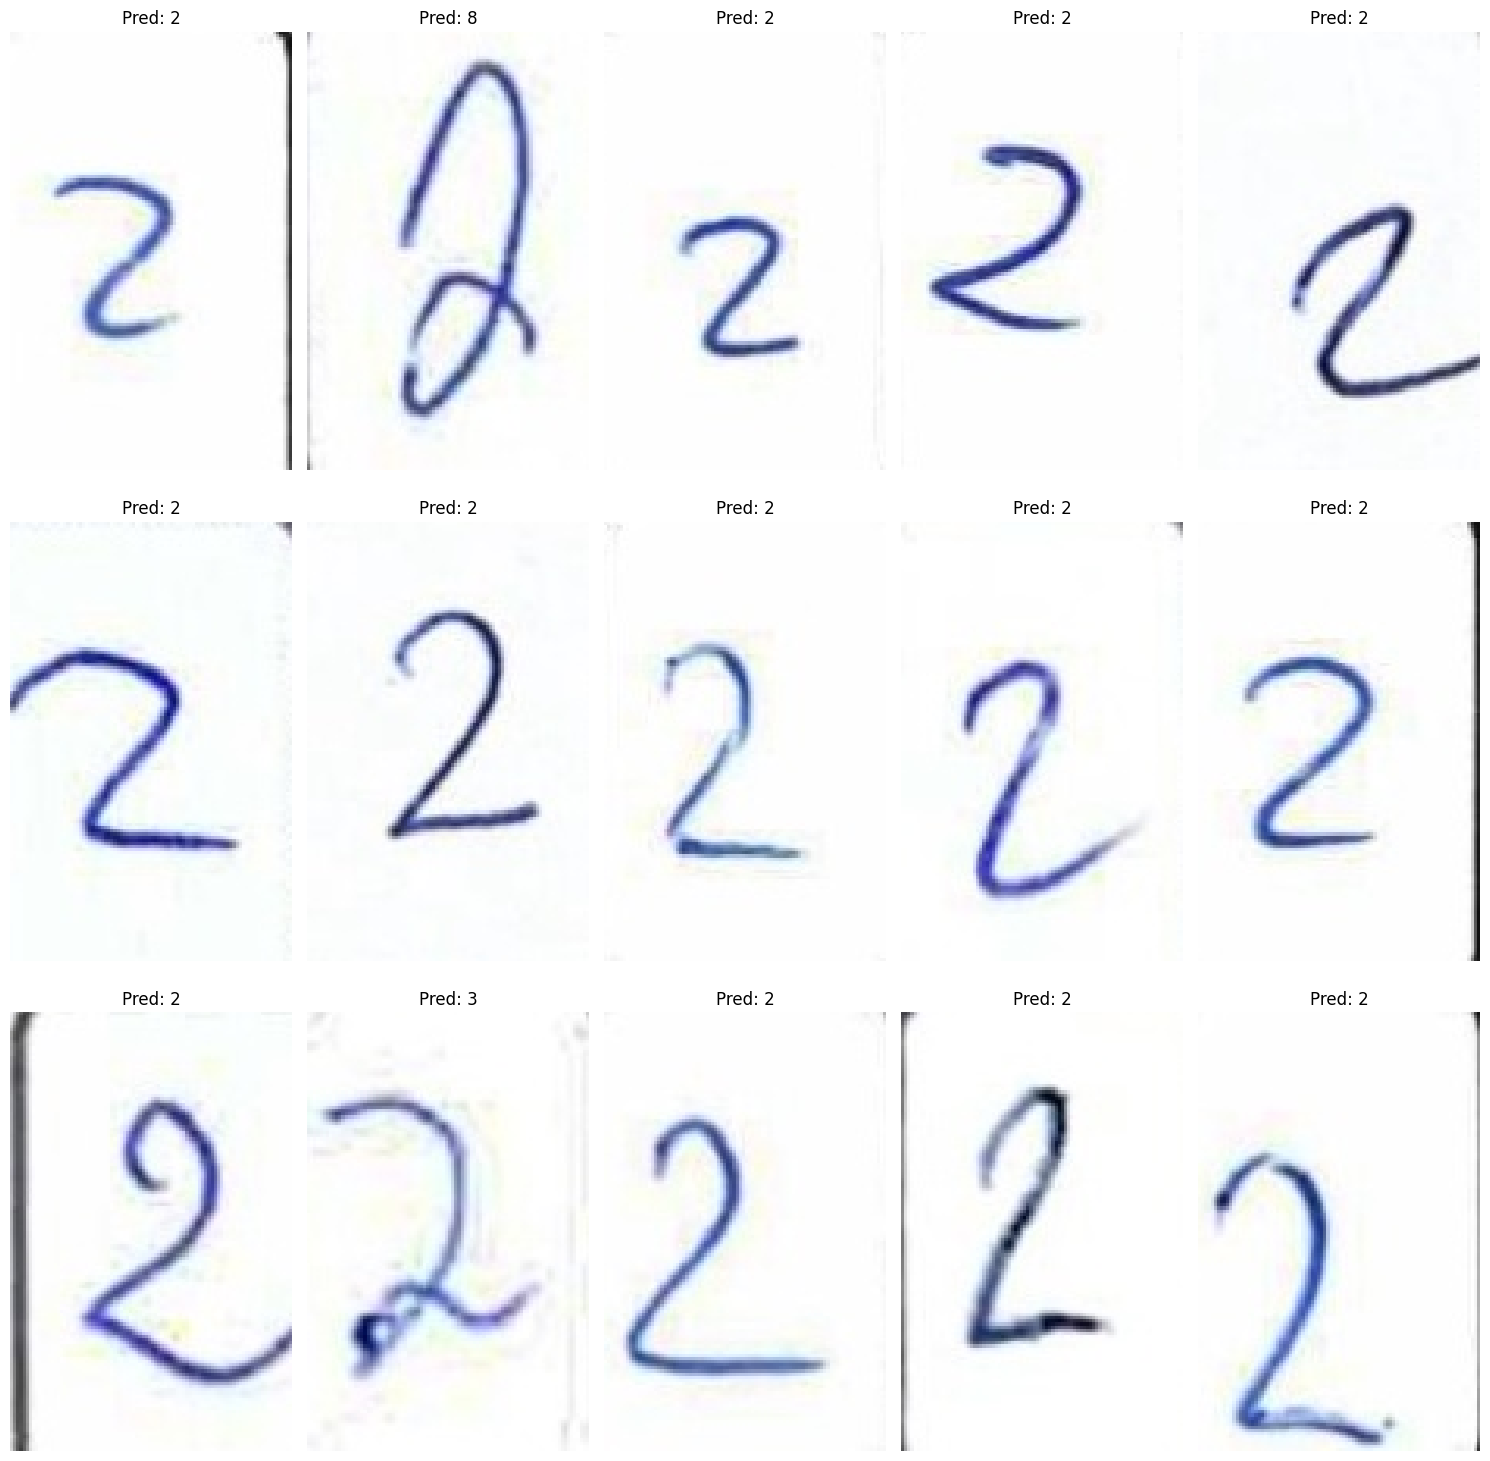

In [44]:
display_random_samples(efficient, "dataset/2", right=False)

1/1 [==============================] - 0s 20ms/step


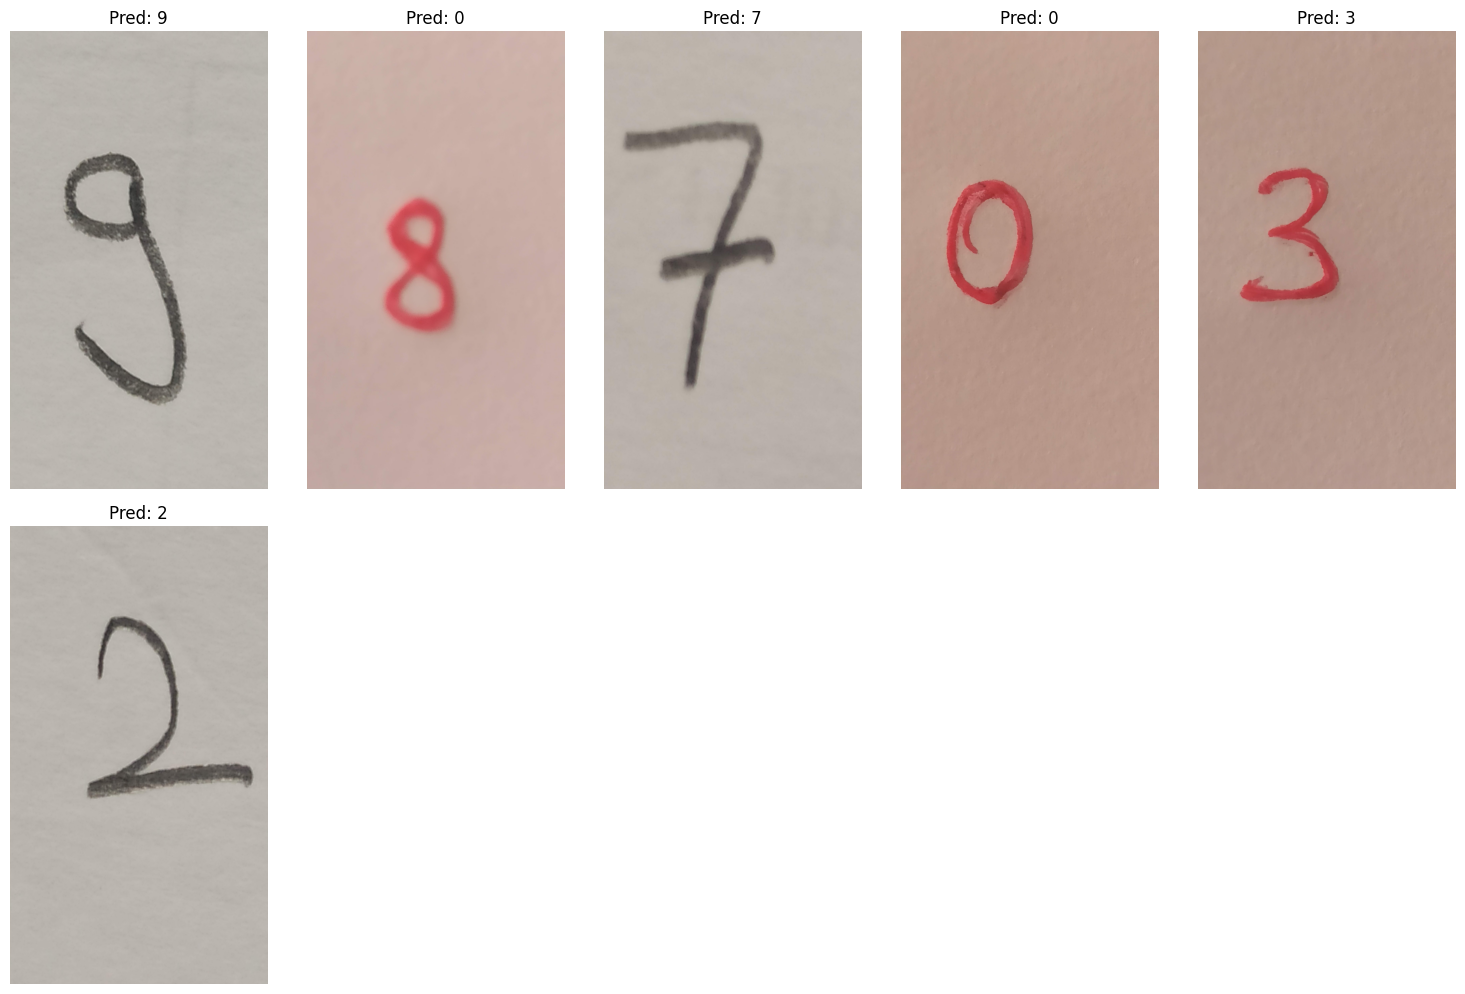

In [45]:
display_random_samples(efficient, "test_real/real/", right= True)

### Model 5: ResNet50V2 with Fine-Tuning

We define and train a ResNet50V2 model with fine-tuning:

1. **Architecture:**
   - **Base Model:** ResNet50V2 pre-trained on ImageNet, excluding the top classification layer (`include_top=False`).
   - **Custom Top Layers:**
     - Global Average Pooling layer.
     - Dense layer with 128 units and ReLU activation.
     - Dense output layer with 10 units and softmax activation.

2. **Compilation:**
   - Loss function: Categorical Crossentropy.
   - Optimizer: Adam with a learning rate of 1e-4.
   - Metrics: Accuracy, Recall, and Precision.

3. **Training:**
   - The model is trained for 10 epochs using the `train_dataset` with a batch size of 32.
   - Validation is performed using `validation_dataset`.
   - ModelCheckpoint callback is used to save the best model.

4. **Time Tracking:**
   - Training time is recorded and added to the `time_spent` list.
   - Number of epochs and steps per epoch are documented.

5. **Post-Training:**
   - Loss curves are plotted to visualize training progress.
   - The model is reloaded from the saved file and evaluated on the validation dataset.
   - Random samples are displayed for visual inspection.

This setup includes fine-tuning the ResNet50V2 base model with additional Dense layers, providing an efficient approach to model training and evaluation.


In [46]:
from tensorflow.keras.applications import ResNet50V2

base_model = ResNet50V2(include_top= False,
                                weights="imagenet",
                                input_shape=(224,224,3))

base_model.trainable = True
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
#x = tf.keras.layers.Dense(128,activation="relu")(x)
#x = tf.keras.layers.Dropout(0.2)(x)
x= tf.keras.layers.Dense(128,activation="relu")(x)
outputs = tf.keras.layers.Dense(10,activation="softmax")(x)
resnet_50_trainable = tf.keras.Model(inputs = base_model.input,outputs = outputs,name="resnet_50_trainable.keras")

resnet_50_trainable.compile(loss="categorical_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(1e-4),
                           metrics=["accuracy",tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
start_time = time.time()
resnet_50_trainable_history = resnet_50_trainable.fit(train_dataset,
                                                     epochs=10,
                                                     steps_per_epoch= len(train_dataset)//32,
                                                     validation_data= validation_dataset,
                                                     validation_steps= len(validation_dataset)//32,
                                                     callbacks = [create_model_checkpoint(resnet_50_trainable.name)])

Epoch 1/10
16/16 [==============================] - 7s 251ms/step - loss: 1.8932 - accuracy: 0.3750 - recall_4: 0.0625 - precision_4: 0.9697 - val_loss: 12.7988 - val_accuracy: 0.1172 - val_recall_4: 0.1172 - val_precision_4: 0.1172
Epoch 2/10
16/16 [==============================] - 4s 223ms/step - loss: 0.9370 - accuracy: 0.7520 - recall_4: 0.4355 - precision_4: 0.9331 - val_loss: 8.0987 - val_accuracy: 0.1406 - val_recall_4: 0.1406 - val_precision_4: 0.1452
Epoch 3/10
16/16 [==============================] - 3s 190ms/step - loss: 0.3178 - accuracy: 0.9141 - recall_4: 0.8555 - precision_4: 0.9460 - val_loss: 8.3150 - val_accuracy: 0.0859 - val_recall_4: 0.0859 - val_precision_4: 0.0859
Epoch 4/10
16/16 [==============================] - 3s 190ms/step - loss: 0.1814 - accuracy: 0.9492 - recall_4: 0.9316 - precision_4: 0.9636 - val_loss: 10.1218 - val_accuracy: 0.1406 - val_recall_4: 0.1406 - val_precision_4: 0.1406
Epoch 5/10
16/16 [==============================] - 3s 191ms/step - lo

In [47]:
end_time = time.time()
resnet_trainable_time_spent = (end_time- start_time)/60
resnet_trainable_epochs = 10
resnet_trainable_steps_of_epochs = 16
time_spent.append(resnet_trainable_time_spent)
steps_of_epochs.append(resnet_trainable_steps_of_epochs)
number_of_epochs.append(resnet_trainable_epochs)

resnet_trainable_time_spent

0.6124350984891256

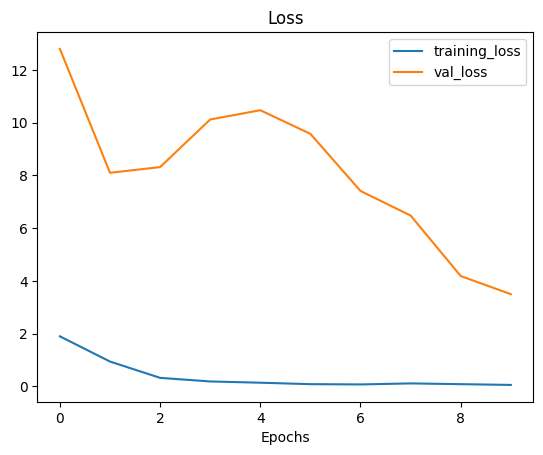

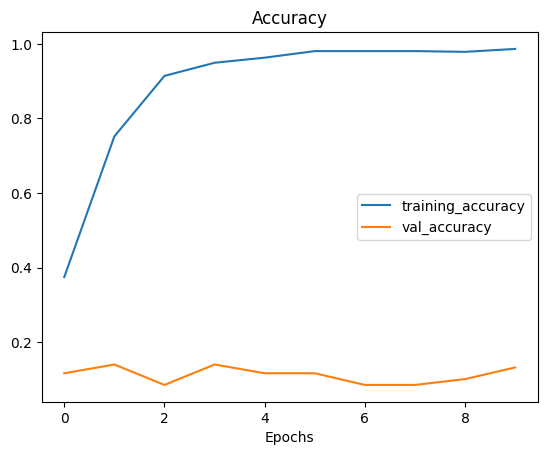

In [48]:
plot_loss_curves(resnet_50_trainable_history)

In [49]:
resnet_trainable = tf.keras.models.load_model("model_experiments/Resnet_50_trainable.keras")
resnet_trainable_evaluate = resnet_trainable.evaluate(validation_dataset)
resnet_trainable_evaluate

135/135 [==============================] - 8s 55ms/step - loss: 3.6299 - accuracy: 0.1058 - recall_4: 0.1044 - precision_4: 0.1084


[3.629910707473755,
 0.10577592253684998,
 0.10438413172960281,
 0.10838150233030319]

1/1 [==============================] - 0s 16ms/step


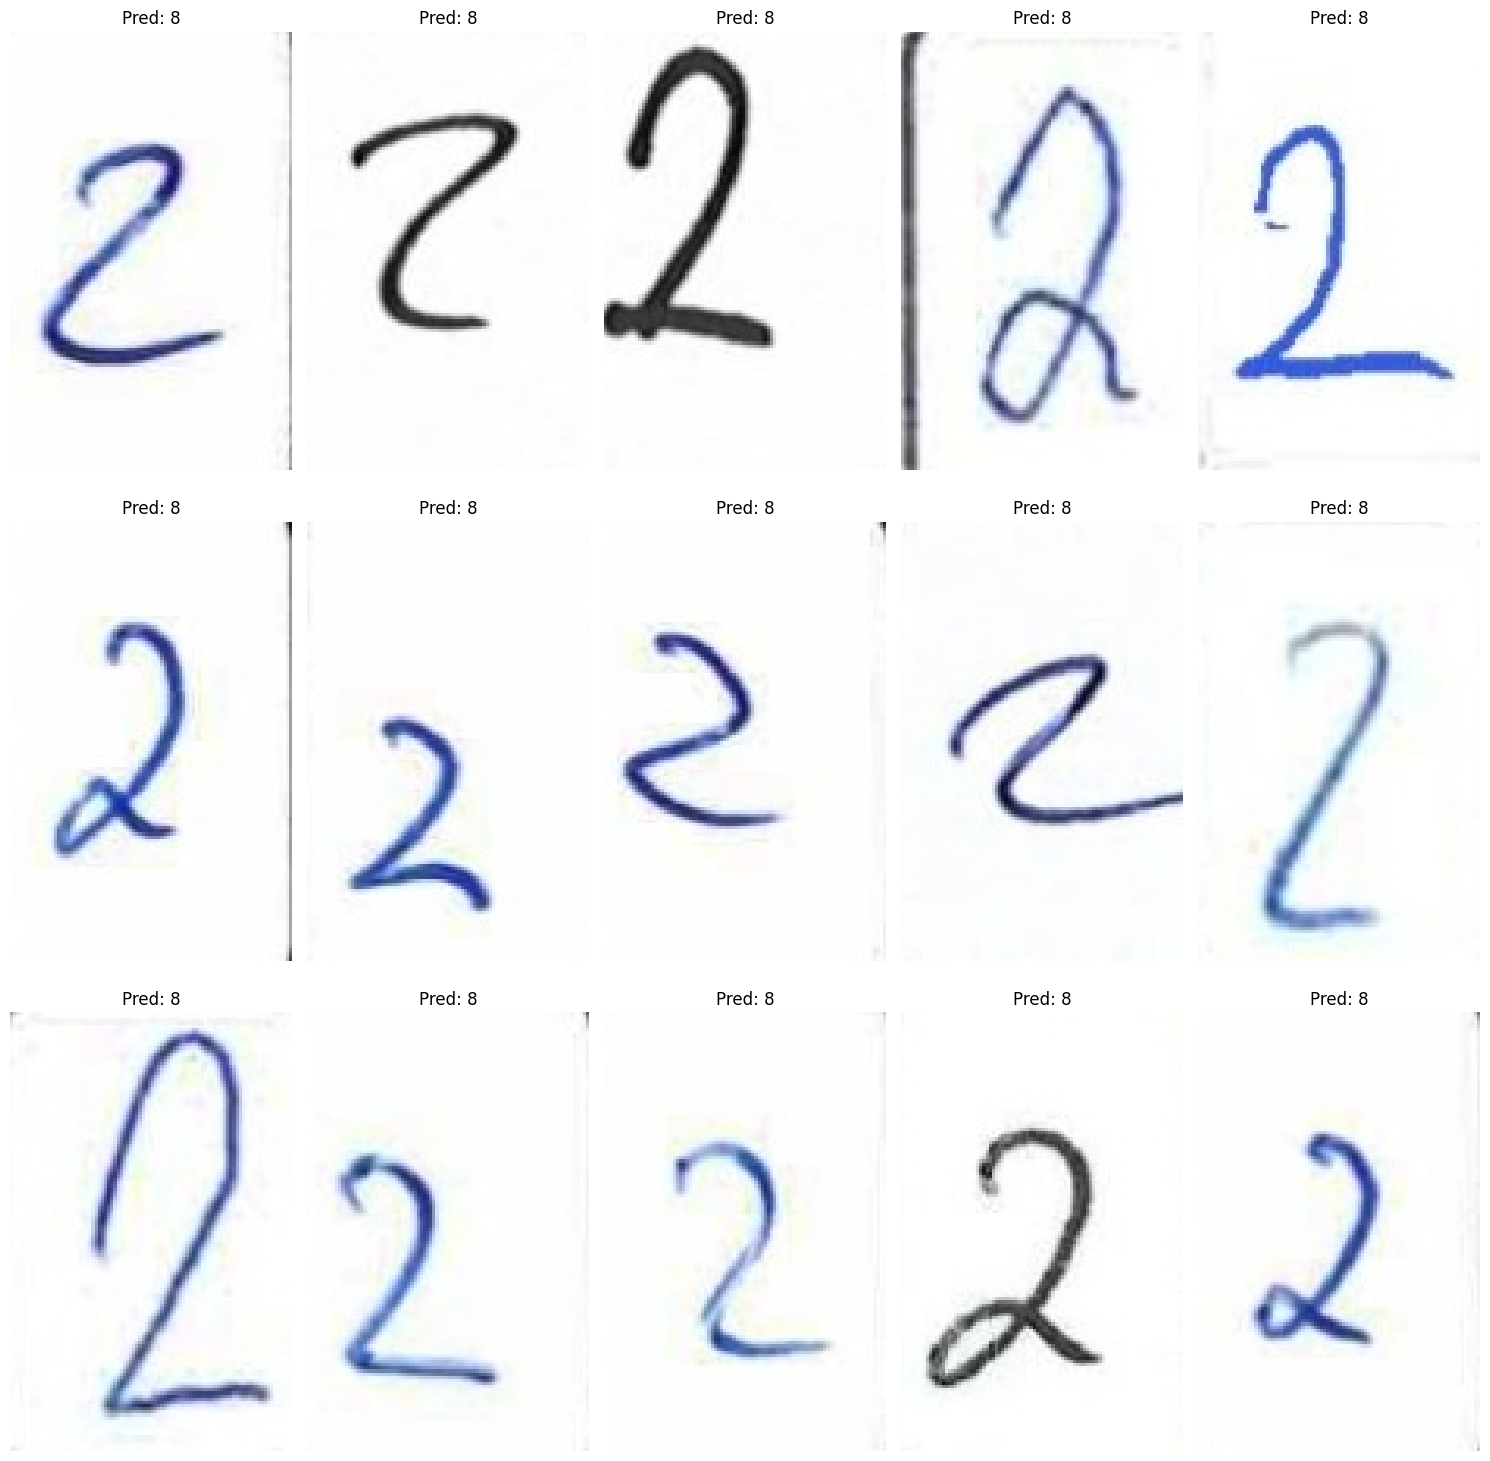

In [50]:
display_random_samples(resnet_trainable, "dataset/2", right=False)

1/1 [==============================] - 0s 18ms/step


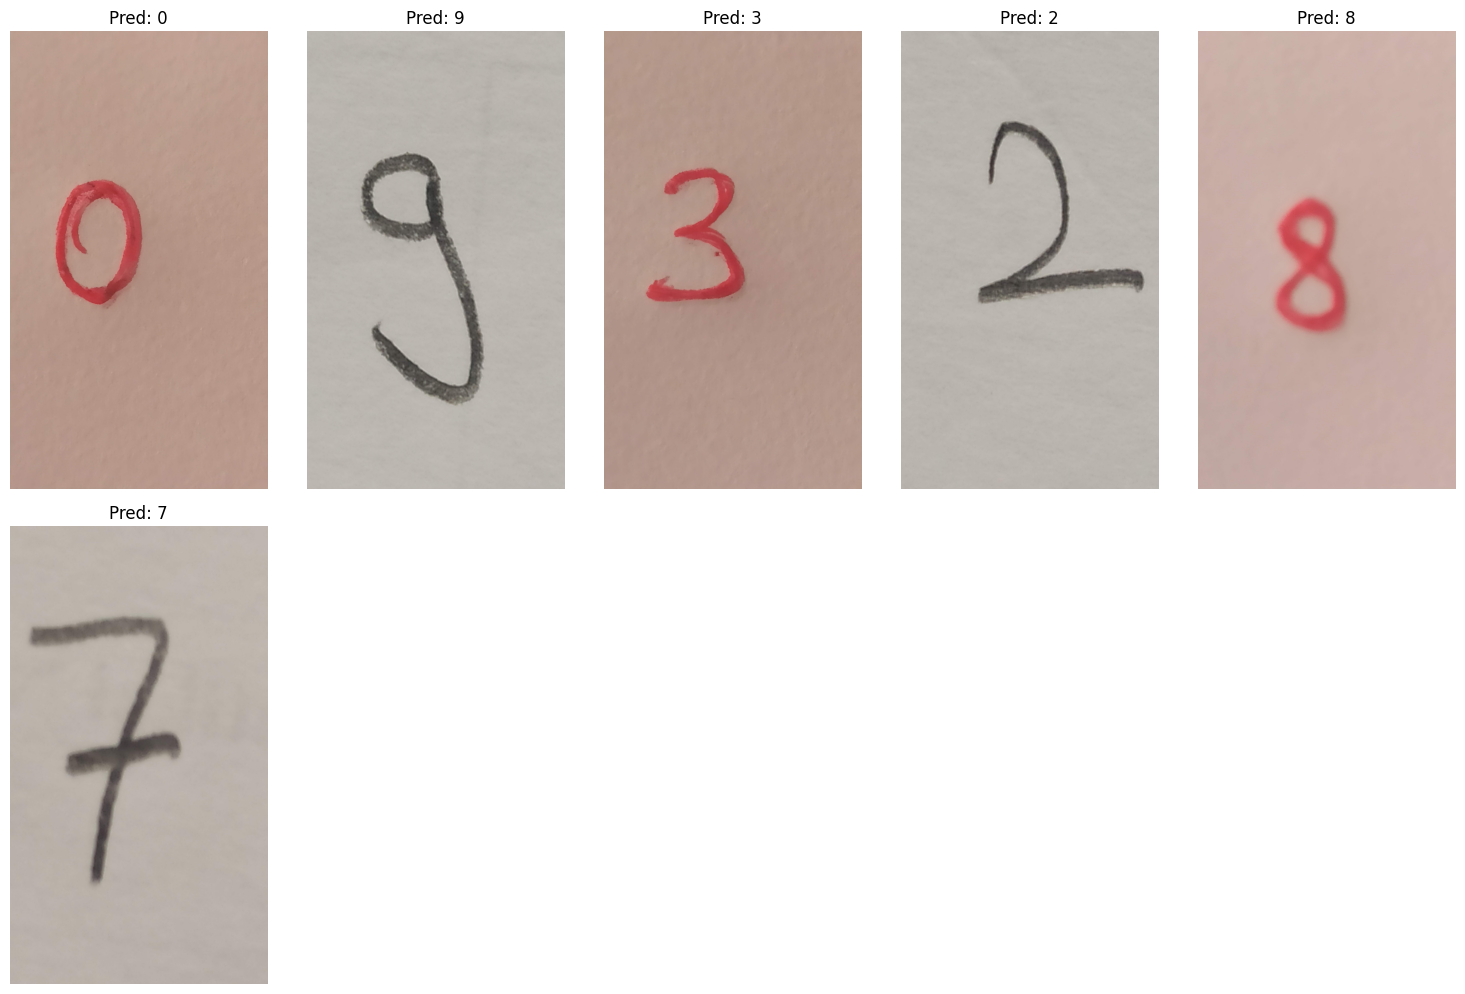

In [51]:
display_random_samples(resnet_trainable, "test_real/real", right=True)

### Model 6: ResNet50V2 with Dropout Layers

We define and train a ResNet50V2 model with additional dropout layers to enhance generalization:

1. **Architecture:**
   - **Base Model:** ResNet50V2 pre-trained on ImageNet, without the top classification layer (`include_top=False`).
   - **Custom Top Layers:**
     - Global Average Pooling layer.
     - Dense layer with 128 units and ReLU activation.
     - Dropout layer with a rate of 0.2 to reduce overfitting.
     - Another Dense layer with 128 units and ReLU activation.
     - Dense output layer with 10 units and softmax activation.

2. **Compilation:**
   - Loss function: Categorical Crossentropy.
   - Optimizer: Adam.
   - Metrics: Accuracy, Recall, and Precision.

3. **Training:**
   - The model is trained for 10 epochs with the `train_dataset`, using a batch size of 32.
   - Validation is performed using `validation_dataset`.
   - ModelCheckpoint callback is used to save the best model.

4. **Time Tracking:**
   - Training time is calculated and added to the `time_spent` list.
   - Number of epochs and steps per epoch are recorded.

5. **Post-Training:**
   - Loss curves are plotted to visualize training progress.
   - The model is reloaded from the saved file and evaluated on the validation dataset.
   - Random samples are displayed for visual inspection.

This model incorporates dropout layers to potentially improve generalization and reduce overfitting.


In [52]:
from tensorflow.keras.applications import ResNet50V2

base_model = ResNet50V2(include_top= False,
                                weights="imagenet",
                                input_shape=(224,224,3))

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128,activation="relu")(x)
outputs = tf.keras.layers.Dense(10,activation="softmax")(x)
resnet_50_dropout = tf.keras.Model(inputs = base_model.input,outputs = outputs,name="resnet_50_dropout.keras")

resnet_50_dropout.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy",tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
start_time = time.time()
resnet50_dropout_history = resnet_50_dropout.fit(train_dataset,
                               epochs=10,
                               steps_per_epoch=len(train_dataset)//32,
                               validation_data = validation_dataset,
                               validation_steps = len(validation_dataset)//32,
                               callbacks = [create_model_checkpoint(resnet_50_dropout.name)]) 


Epoch 1/10
16/16 [==============================] - 7s 253ms/step - loss: 1.3176 - accuracy: 0.5391 - recall_5: 0.3633 - precision_5: 0.7949 - val_loss: 909.0263 - val_accuracy: 0.1094 - val_recall_5: 0.1094 - val_precision_5: 0.1094
Epoch 2/10
16/16 [==============================] - 3s 190ms/step - loss: 0.6105 - accuracy: 0.8418 - recall_5: 0.7695 - precision_5: 0.8894 - val_loss: 5130.5723 - val_accuracy: 0.0938 - val_recall_5: 0.0938 - val_precision_5: 0.0938
Epoch 3/10
16/16 [==============================] - 4s 224ms/step - loss: 0.5372 - accuracy: 0.8457 - recall_5: 0.8145 - precision_5: 0.9065 - val_loss: 384.9012 - val_accuracy: 0.1094 - val_recall_5: 0.1094 - val_precision_5: 0.1094
Epoch 4/10
16/16 [==============================] - 3s 221ms/step - loss: 0.4817 - accuracy: 0.8477 - recall_5: 0.8047 - precision_5: 0.8879 - val_loss: 7.0687 - val_accuracy: 0.0703 - val_recall_5: 0.0703 - val_precision_5: 0.0714
Epoch 5/10
16/16 [==============================] - 3s 190ms/step

In [53]:
end_time = time.time()
resnet_dropout_time_spent = (end_time-start_time)/60
resnet_dropout_epochs = 10
resnet_dropout_steps_epochs = 16
time_spent.append(resnet_dropout_time_spent)
steps_of_epochs.append(resnet_dropout_steps_epochs)
number_of_epochs.append(resnet_dropout_epochs)

resnet_dropout_time_spent

0.596677835782369

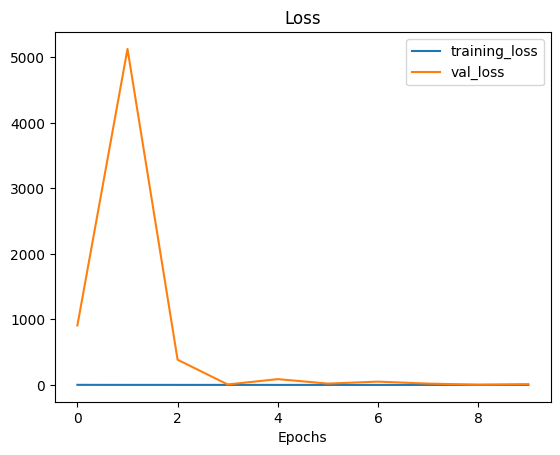

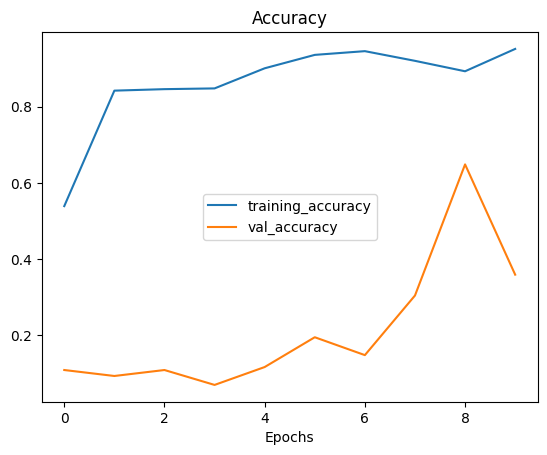

In [54]:
plot_loss_curves(resnet50_dropout_history)

In [55]:
model_resnet50_dropout =  tf.keras.models.load_model("model_experiments/Resnet_50_dropout.keras")
model_resnet50_dropout_evaluate = model_resnet50_dropout.evaluate(validation_dataset)
model_resnet50_dropout_evaluate

135/135 [==============================] - 8s 55ms/step - loss: 4.6552 - accuracy: 0.6231 - recall_5: 0.6193 - precision_5: 0.6284


[4.655233860015869, 0.6230573058128357, 0.6193458437919617, 0.6283831596374512]

1/1 [==============================] - 0s 18ms/step


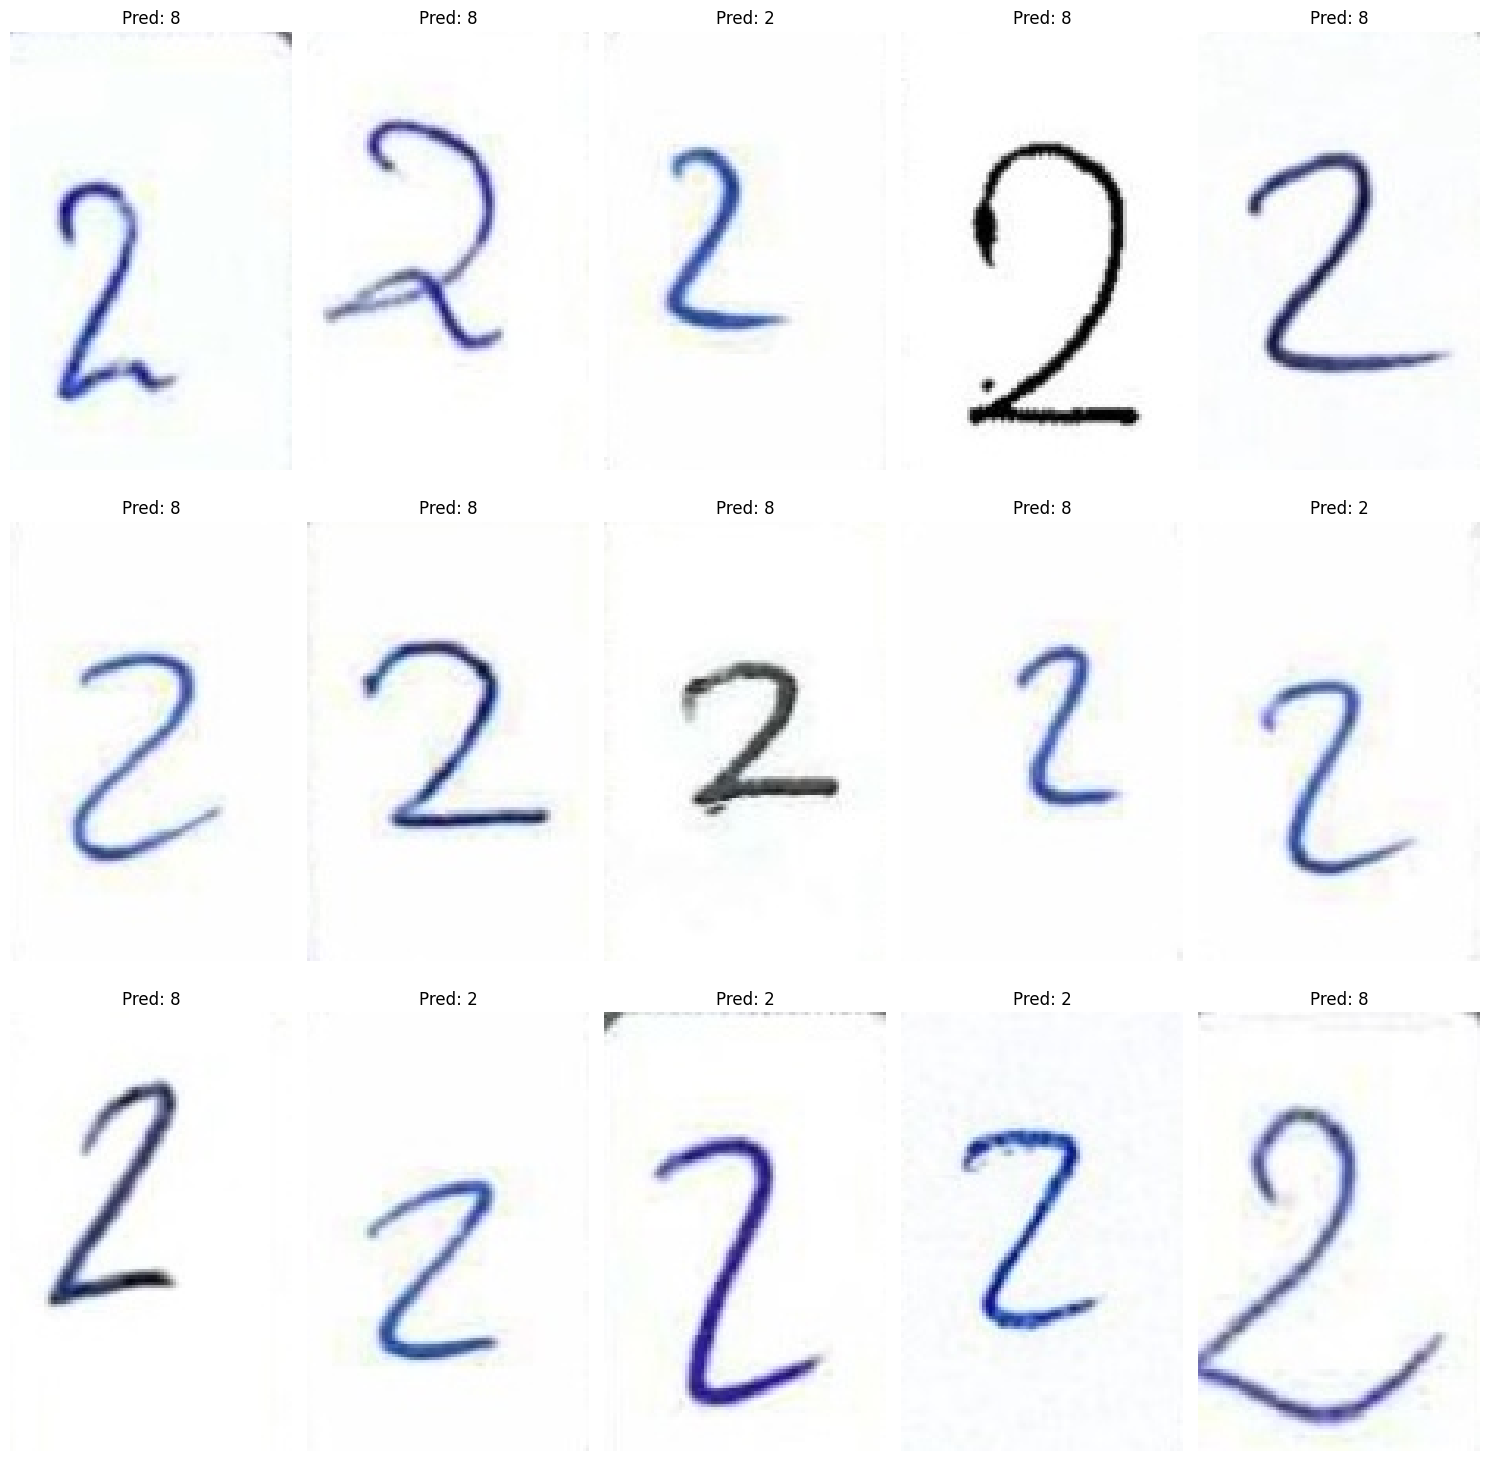

In [56]:
display_random_samples(resnet_50_dropout,"dataset/2")

1/1 [==============================] - 0s 17ms/step


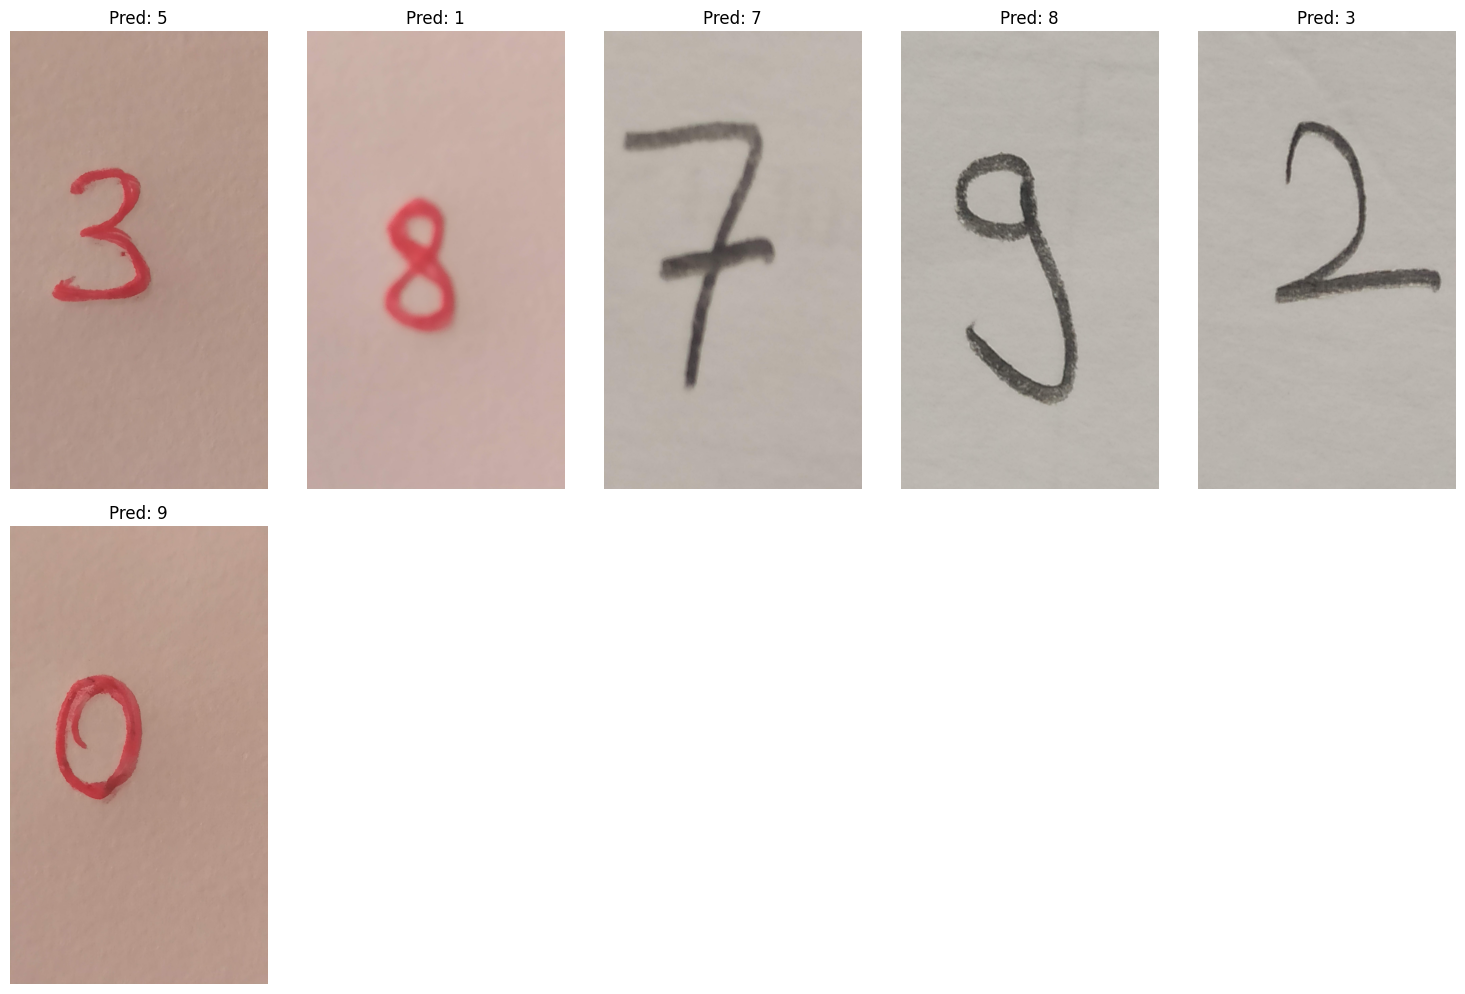

In [57]:
display_random_samples(resnet_50_dropout,"test_real/real/",right=True)

### Model 7: ResNet50V2 with Fine-Tuning and Dropout Layers

We define and train a ResNet50V2 model with fine-tuning and additional dropout layers:

1. **Architecture:**
   - **Base Model:** ResNet50V2 pre-trained on ImageNet, with `include_top=False` to exclude the top classification layer.
   - **Custom Top Layers:**
     - Global Average Pooling layer.
     - Dense layer with 128 units and ReLU activation.
     - Dropout layer with a rate of 0.2 to mitigate overfitting.
     - Two additional Dense layers with 128 units each and ReLU activation.
     - Dense output layer with 10 units and softmax activation.

2. **Compilation:**
   - Loss function: Categorical Crossentropy.
   - Optimizer: Adam with a learning rate of 1e-4.
   - Metrics: Accuracy, Recall, and Precision.

3. **Training:**
   - The model is trained for 5 epochs with the `train_dataset`, using a batch size of 10.
   - Validation is performed using `validation_dataset`.
   - ModelCheckpoint callback is used to save the best model.

4. **Time Tracking:**
   - Training time is calculated and added to the `time_spent` list.
   - Number of epochs and steps per epoch are recorded.

5. **Post-Training:**
   - Loss curves are plotted to visualize training progress.
   - The model is reloaded from the saved file and evaluated on the validation dataset.
   - Random samples are displayed for visual inspection.

This model incorporates fine-tuning of ResNet50V2 along with dropout layers to potentially improve performance and reduce overfitting.


In [58]:
from tensorflow.keras.applications import ResNet50V2

base_model = ResNet50V2(include_top= False,
                                weights="imagenet",
                                input_shape=(224,224,3))

base_model.trainable = True
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x= tf.keras.layers.Dense(128,activation="relu")(x)
x= tf.keras.layers.Dense(128,activation="relu")(x)
outputs = tf.keras.layers.Dense(10,activation="softmax")(x)
resnet_50_trainable_dropout = tf.keras.Model(inputs = base_model.input,outputs = outputs,
                                             name="resnet_50_trainable_dropout.keras")

resnet_50_trainable_dropout.compile(loss="categorical_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(1e-4),
                           metrics=["accuracy",tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [59]:
start_time = time.time()
resnet_50_trainable_dropout_history = resnet_50_trainable_dropout.fit(train_dataset,
                                                     epochs=5,
                                                     steps_per_epoch= len(train_dataset)//10,
                                                     validation_data= validation_dataset,
                                                     validation_steps= len(validation_dataset)//10,
                                                     callbacks = [create_model_checkpoint(resnet_50_trainable_dropout.name)])

Epoch 1/5
53/53 [==============================] - 14s 205ms/step - loss: 1.6513 - accuracy: 0.4847 - recall_6: 0.1675 - precision_6: 0.9895 - val_loss: 7.9191 - val_accuracy: 0.0986 - val_recall_6: 0.0986 - val_precision_6: 0.0988
Epoch 2/5
53/53 [==============================] - 10s 187ms/step - loss: 0.2809 - accuracy: 0.9440 - recall_6: 0.8750 - precision_6: 0.9706 - val_loss: 23.4835 - val_accuracy: 0.1034 - val_recall_6: 0.1034 - val_precision_6: 0.1034
Epoch 3/5
53/53 [==============================] - 10s 196ms/step - loss: 0.1306 - accuracy: 0.9634 - recall_6: 0.9522 - precision_6: 0.9717 - val_loss: 2.2734 - val_accuracy: 0.3389 - val_recall_6: 0.2861 - val_precision_6: 0.5891
Epoch 4/5
53/53 [==============================] - 10s 196ms/step - loss: 0.0948 - accuracy: 0.9764 - recall_6: 0.9717 - precision_6: 0.9827 - val_loss: 0.2068 - val_accuracy: 0.9351 - val_recall_6: 0.9231 - val_precision_6: 0.9505
Epoch 5/5
53/53 [==============================] - 10s 196ms/step - los

In [60]:
end_time = time.time()
resnet_trainable_dropout_time_spent = (end_time - start_time)/60
resnet_trainable_dropout_epochs = 5
resnet_trainable_dropout_steps_of_epochs = 53
time_spent.append(resnet_trainable_dropout_time_spent)
steps_of_epochs.append(resnet_trainable_dropout_steps_of_epochs)
number_of_epochs.append(resnet_trainable_dropout_epochs)

resnet_trainable_dropout_time_spent

0.9223356246948242

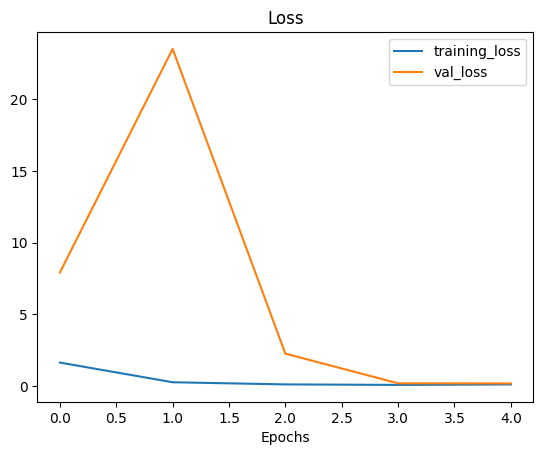

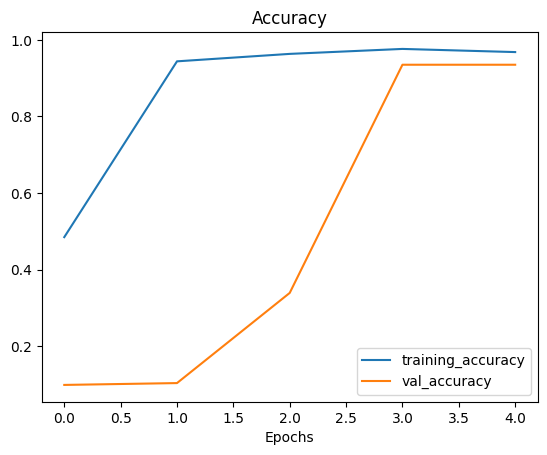

In [61]:
plot_loss_curves(resnet_50_trainable_dropout_history)

In [62]:
resnet_trainable_dropout =  tf.keras.models.load_model("model_experiments/resnet_50_trainable_dropout.keras")
resnet_trainable_dropout_evaluate = resnet_trainable_dropout.evaluate(validation_dataset)
resnet_trainable_dropout_evaluate

135/135 [==============================] - 8s 55ms/step - loss: 0.1925 - accuracy: 0.9432 - recall_6: 0.9371 - precision_6: 0.9508


[0.19250676035881042,
 0.9431686401367188,
 0.9371375441551208,
 0.9508119821548462]

1/1 [==============================] - 0s 15ms/step


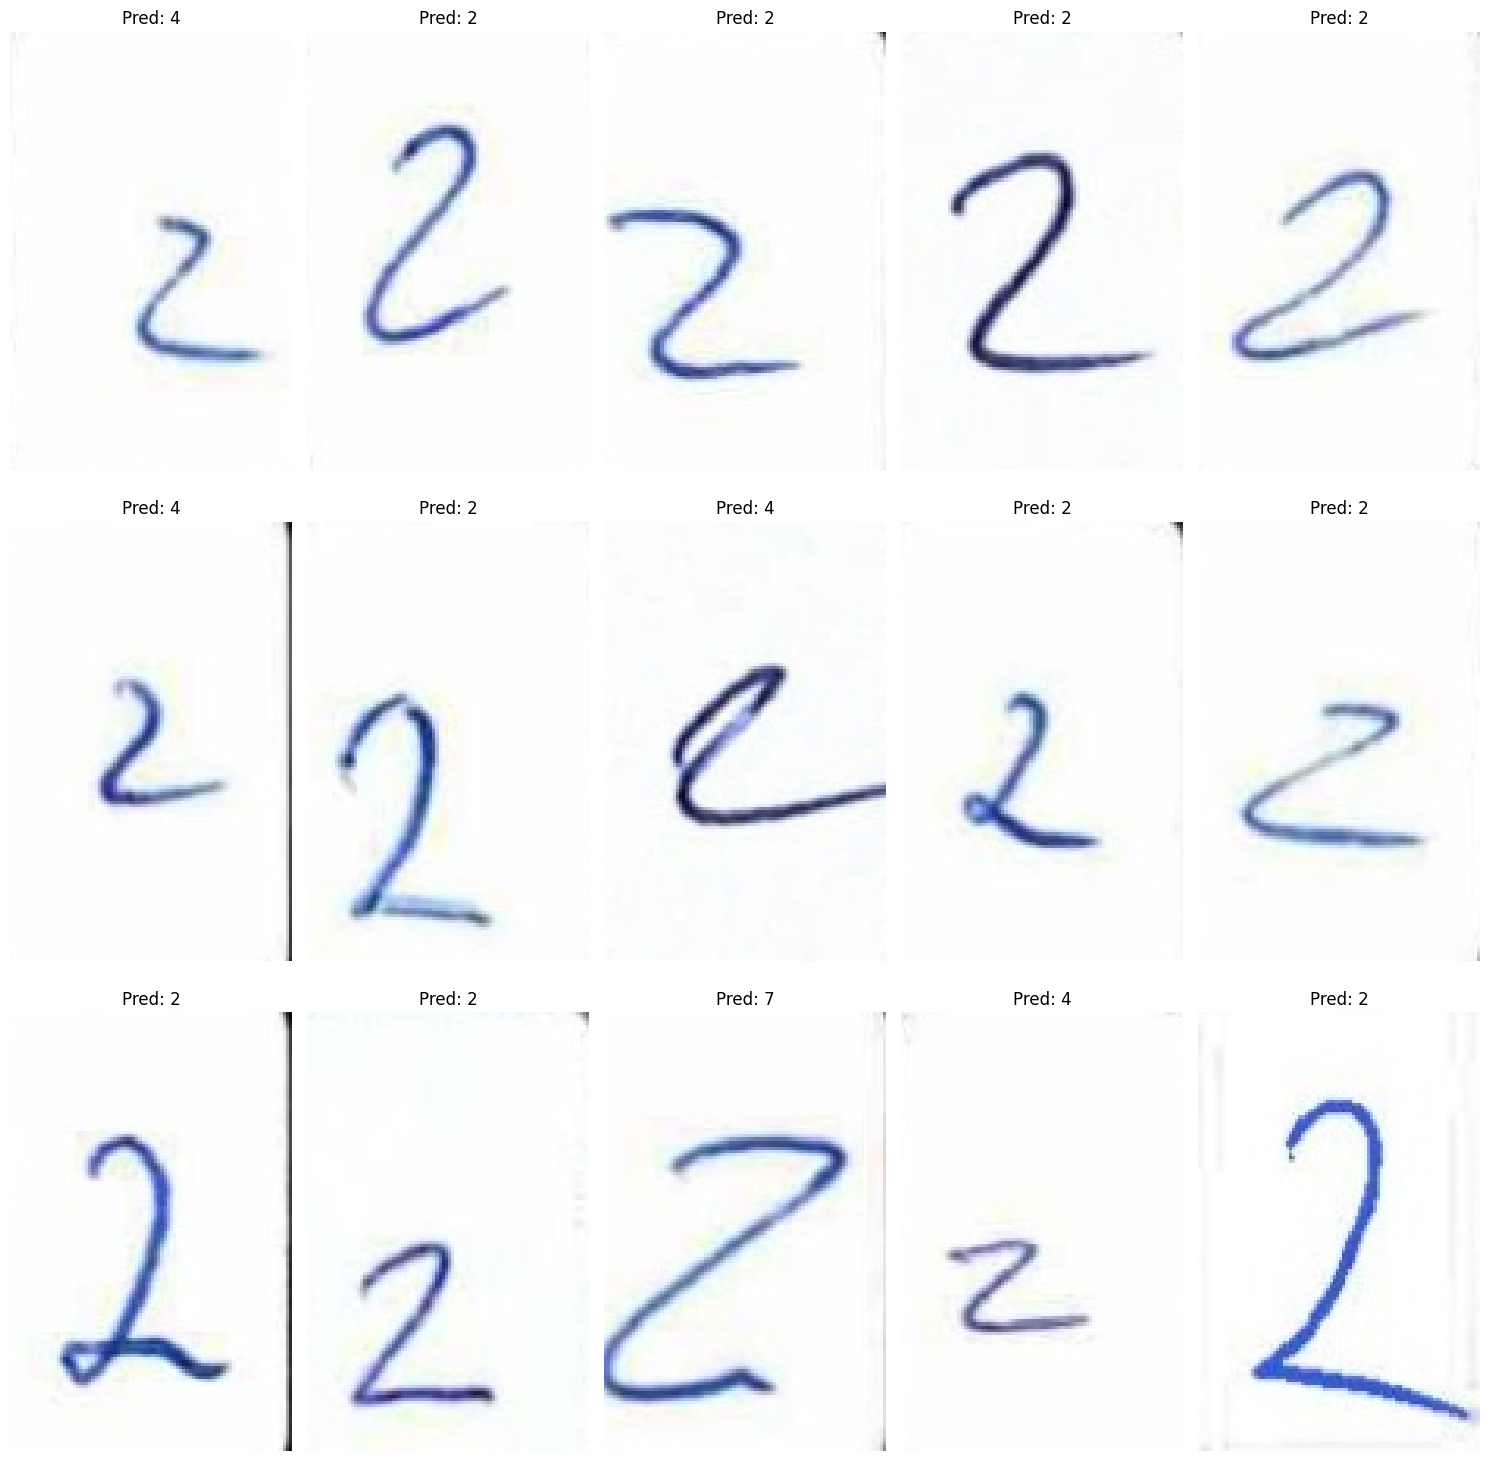

In [63]:
display_random_samples(resnet_trainable_dropout, "dataset/2", right=False)

1/1 [==============================] - 0s 14ms/step


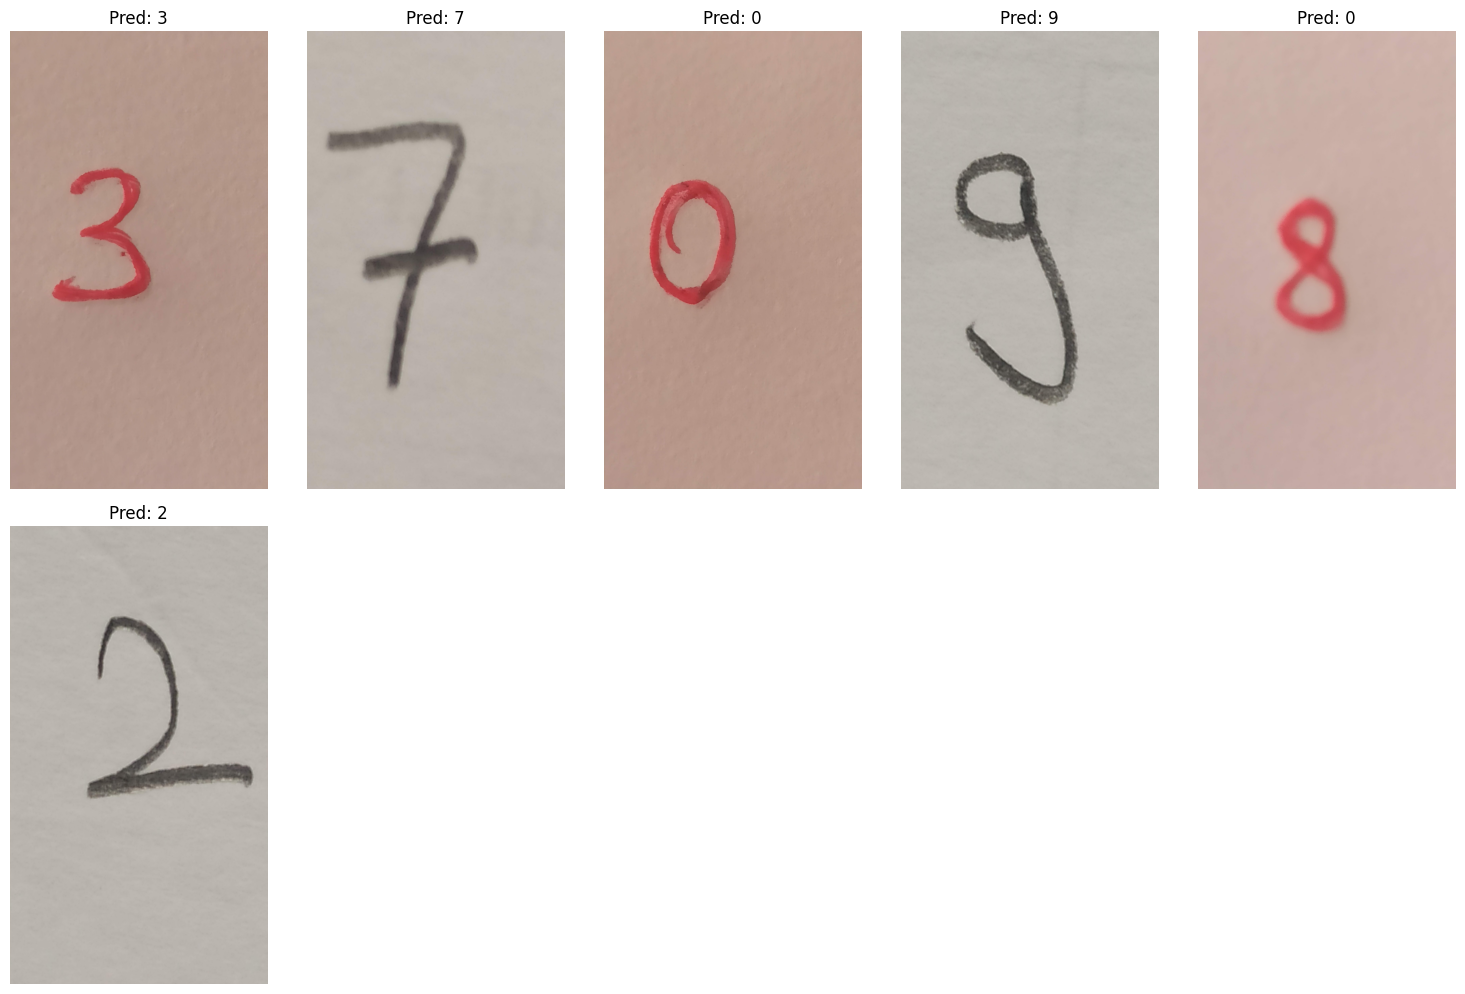

In [64]:
display_random_samples(resnet_trainable_dropout,"test_real/real",right=True)

In [67]:
#Compare the results of models

import pandas as pd

df = pd.DataFrame({"model_1" : model_1_evaluate,
                           "model_2" : model_2_evaluate,
                             "resnet50": model_resnet_evaluate,
                            "efficientnet" : efficient_evaluate,
                           "resnet50_trainable" : resnet_trainable_evaluate,
                             "resnet50_dropout" : model_resnet50_dropout_evaluate,
                               "resnet50_train_dropout" : resnet_trainable_dropout_evaluate}  
                                                          ,index =["loss","accuracy","recall","precision",])

steps_of_epochs = [int(x) for x in steps_of_epochs]
number_of_epochs = [int(x) for x in number_of_epochs]

# Calculate F1 Scores
f1_scores = 2 * (df.loc['precision'] * df.loc['recall']) / (df.loc['precision'] + df.loc['recall'])

# Add the F1 Score row to the DataFrame
df.loc['f1_score'] = f1_scores

# Display the updated DataFrame
df.loc["time"] = time_spent
df.loc["epochs"] = number_of_epochs
df.loc["step of epoch"] = steps_of_epochs

df.round(2)

model_1  model_2  resnet50  efficientnet  resnet50_trainable  \
loss              2.01     2.28      2.57          0.06                3.63   
accuracy          0.30     0.17      0.69          0.98                0.11   
recall            0.10     0.00      0.68          0.98                0.10   
precision         0.49     0.67      0.70          0.98                0.11   
f1_score          0.17     0.00      0.69          0.98                0.11   
time              1.22     1.29      0.62          0.63                0.61   
epochs           30.00    30.00     10.00         10.00               10.00   
step of epoch    16.00    16.00     16.00         16.00               16.00   

               resnet50_dropout  resnet50_train_dropout  
loss                       4.66                    0.19  
accuracy                   0.62                    0.94  
recall                     0.62                    0.94  
precision                  0.63                    0.95  
f1_score                   0.62                    0.94  
time                       0.60                    0.92  
epochs                    10.00                    5.00  
step of epoch             16.00                   53.00

### Model Performance Observations

Here's a summary of the performance metrics for each model:

| Model                    | Loss | Accuracy | Recall | Precision | F1 Score | Time (min) | Epochs | Steps per Epoch |
|--------------------------|------|----------|--------|-----------|----------|------------|--------|-----------------|
| `model_1`                | 2.01 | 0.30     | 0.10   | 0.49      | 0.17     | 1.22       | 30     | 16              |
| `model_2`                | 2.28 | 0.17     | 0.00   | 0.67      | 0.00     | 1.29       | 30     | 16              |
| `resnet50`               | 2.57 | 0.69     | 0.68   | 0.70      | 0.69     | 0.62       | 10     | 16              |
| `efficientnet`           | 0.06 | 0.98     | 0.98   | 0.98      | 0.98     | 0.63       | 10     | 16              |
| `resnet50_trainable`     | 3.63 | 0.11     | 0.10   | 0.11      | 0.11     | 0.61       | 10     | 16              |
| `resnet50_dropout`       | 4.66 | 0.62     | 0.62   | 0.63      | 0.62     | 0.60       | 10     | 16              |
| `resnet50_train_dropout` | 0.19 | 0.94     | 0.94   | 0.95      | 0.94     | 0.92       | 5      | 53              |

**Key Observations:**

- **Top Performers:**
  - **`efficientnet`** achieved the highest performance metrics with very low loss, and high accuracy, recall, precision, and F1 score, indicating it is highly effective for this task.
  - **`resnet50_train_dropout`** also performed exceptionally well with high accuracy, recall, precision, and F1 score, though it required fewer epochs.

- **Performance Concerns:**
  - **`resnet50_trainable`** showed high loss and low performance metrics, indicating potential issues with overfitting or inadequate model configuration.
  - **`resnet50_dropout`** had high loss but better performance metrics compared to `resnet50_trainable`, suggesting it may have benefited from dropout regularization.

- **Intermediate Performers:**
  - **`resnet50`** demonstrated good performance with a reasonable balance of loss and accuracy but was outperformed by the top models.
  - **`model_1`** and **`model_2`** had higher loss and lower accuracy, recall, precision, and F1 score, suggesting that these simpler models may not be sufficient for the task.

- **Training Time and Epochs:**
  - **`efficientnet`** and **`resnet50`** were trained for 10 epochs, showing efficient training with high performance.
  - **`resnet50_train_dropout`** was trained for only 5 epochs but still achieved excellent performance metrics, suggesting its effectiveness with fewer epochs.

- **Training Efficiency:**
  - **`efficientnet`** was the most efficient in terms of time and achieved the best metrics.
  - **`resnet50_train_dropout`** had the longest training time per epoch but still achieved high performance with fewer total epochs.

These observations highlight **`efficientnet`** and **`resnet50_train_dropout`** as the most effective models, with **`efficientnet`** excelling in accuracy and **`resnet50_train_dropout`** showing strong all-around performance.
